# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [ ]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



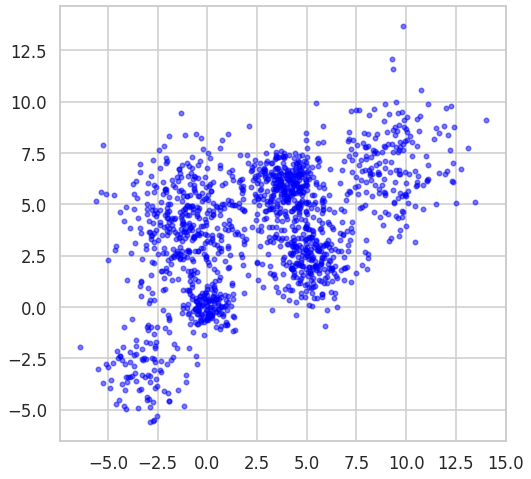

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

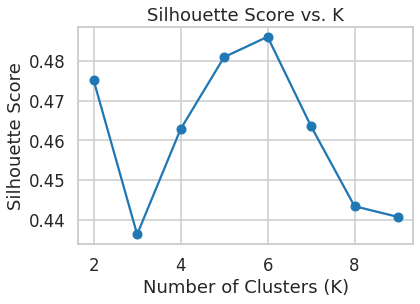

The silhouette score for K=9 is: <function silhouette_score at 0x7fcd20b34040>
The best value of K is: 6
The silhouette score for the best K (6) is: <function silhouette_score at 0x7fcd20b34040>


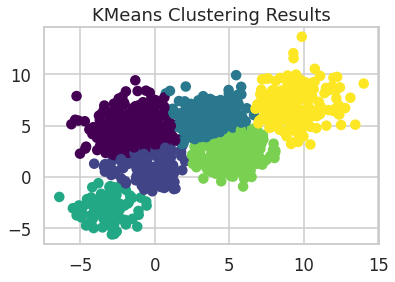

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
# Create a range of K values to test
k_range = range(1, 20)

# Initialize an empty list to store the inertia values for each K
inertia = []

# Loop over the range of K values and fit the KMeans model for each K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Multi_blob_Data)
    inertia.append(kmeans.inertia_)

# Plot the inertia values for each K
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Distortion Function vs. K')
plt.show()

# silhoute 
# Set the range of K values to test
k_range = range(2, 10)

# Initialize empty lists to store silhouette scores and best K
silhouette_scores = []
best_k = None
best_silhouette_score = -1

# Loop over the range of K values and compute silhouette score for each
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Multi_blob_Data)
    labels = kmeans.labels_
    score = silhouette_score(Multi_blob_Data, labels)
    silhouette_scores.append(score)
    
    # Update best K and silhouette score if current score is higher
    if score > best_silhouette_score:
        best_k = k
        best_silhouette_score = score

# Plot the silhouette scores for each K
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. K')
plt.show()
print(f"The silhouette score for K={k} is: {silhouette_score}")
best_silhouette_score = silhouette_score

# Print and store the silhouette score for the best K
print(f"The best value of K is: {best_k}")
print(f"The silhouette score for the best K ({best_k}) is: {best_silhouette_score}")
best_k_silhouette_score = best_silhouette_score



n_clusters = 6

# Initialize the KMeans model with the specified number of clusters
kmeans = KMeans(n_clusters)

# Fit the model to the data
kmeans.fit(Multi_blob_Data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Plot the clusters
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='viridis')
plt.title("KMeans Clustering Results")
plt.show()

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

Silhouette score (Affinity: euclidean, Linkage: average, Distance: 1): 0.324
Silhouette score (Affinity: euclidean, Linkage: average, Distance: 1.5): 0.296
Silhouette score (Affinity: euclidean, Linkage: average, Distance: 2): 0.316
Silhouette score (Affinity: euclidean, Linkage: average, Distance: 3): 0.355
Silhouette score (Affinity: euclidean, Linkage: single, Distance: 1): -0.149
Silhouette score (Affinity: euclidean, Linkage: single, Distance: 1.5): 0.174
Silhouette score (Affinity: euclidean, Linkage: single, Distance: 2): 0.322
Silhouette score (Affinity: manhattan, Linkage: average, Distance: 1): 0.341
Silhouette score (Affinity: manhattan, Linkage: average, Distance: 1.5): 0.311
Silhouette score (Affinity: manhattan, Linkage: average, Distance: 2): 0.278
Silhouette score (Affinity: manhattan, Linkage: average, Distance: 3): 0.296
Silhouette score (Affinity: manhattan, Linkage: single, Distance: 1): -0.408
Silhouette score (Affinity: manhattan, Linkage: single, Distance: 1.5): 

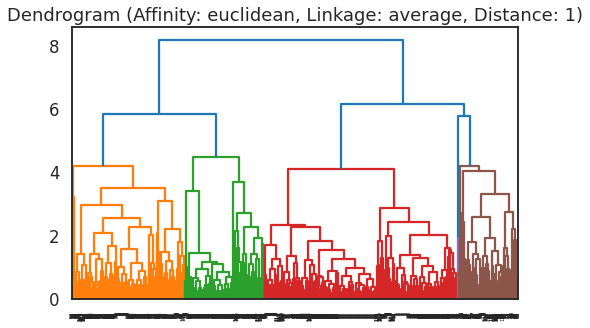

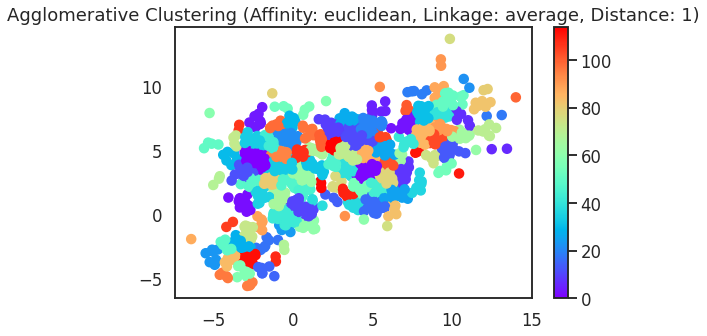

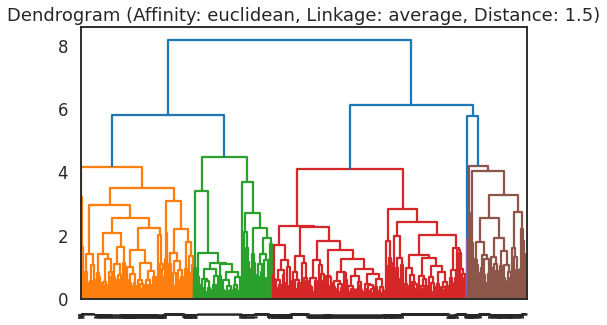

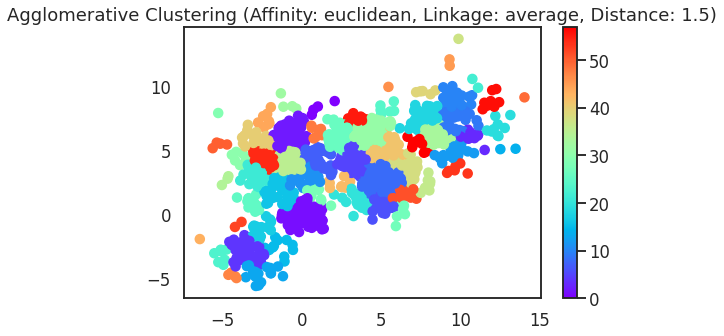

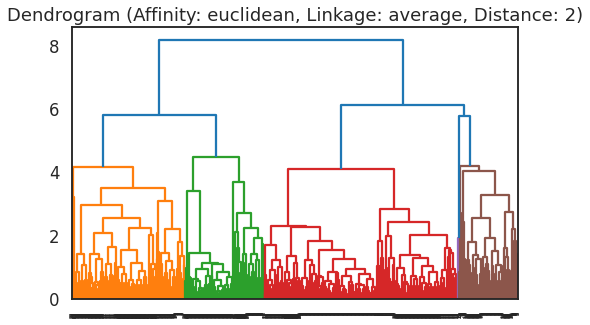

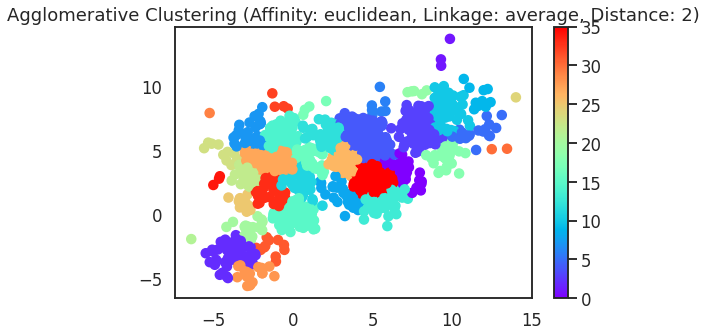

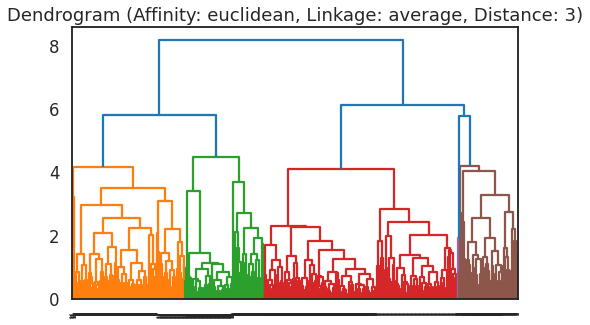

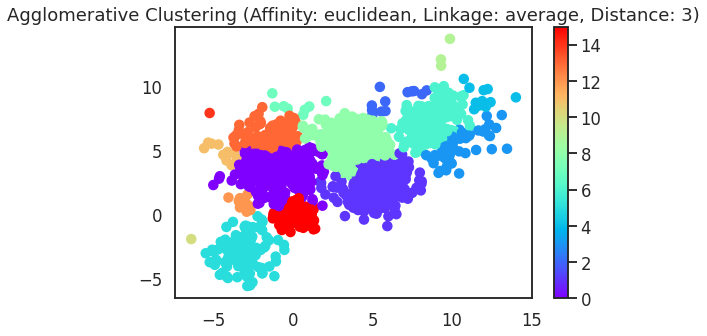

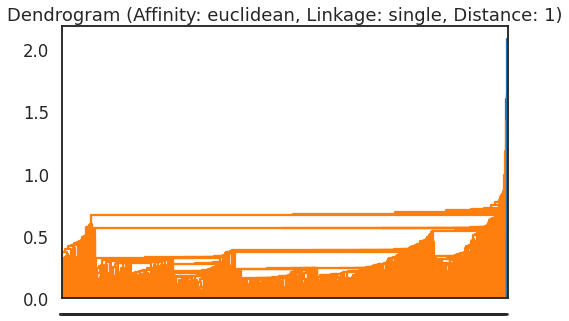

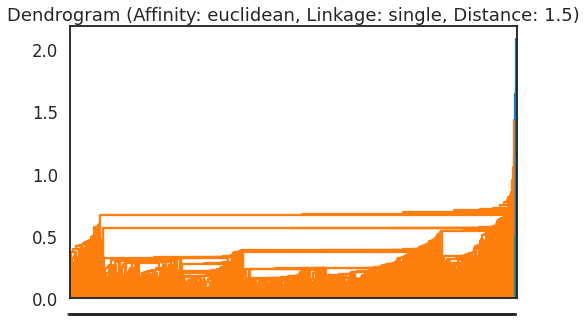

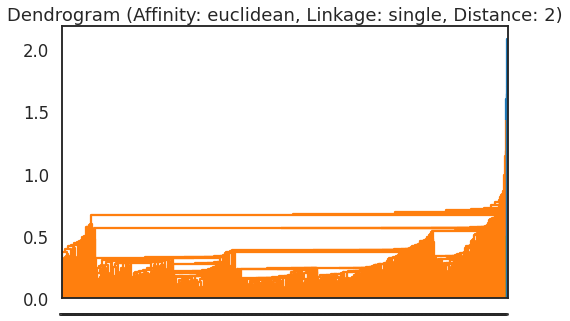

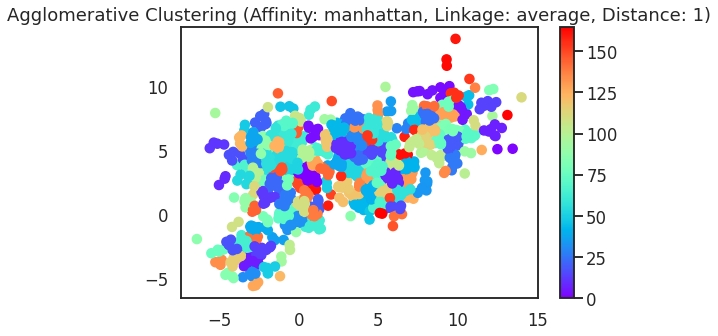

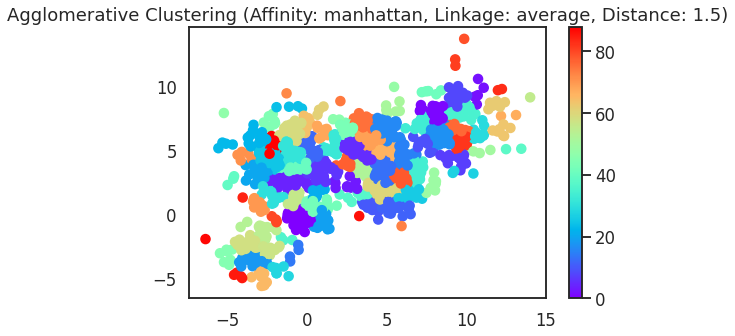

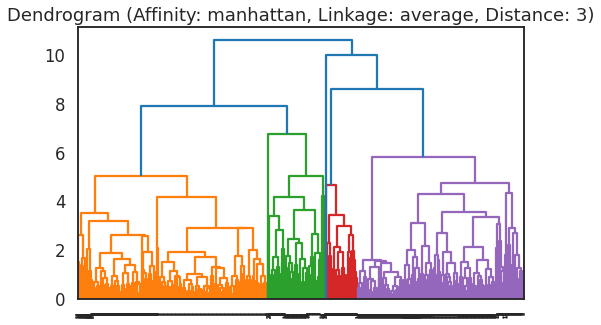

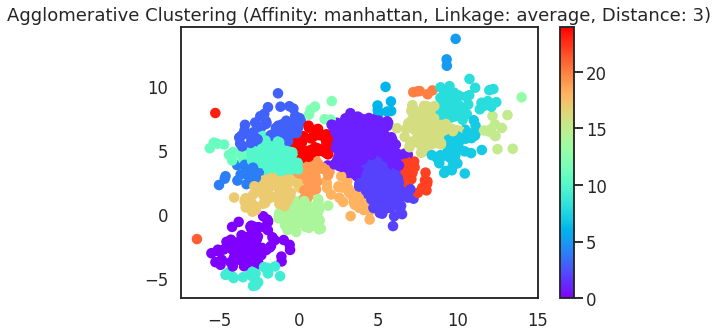

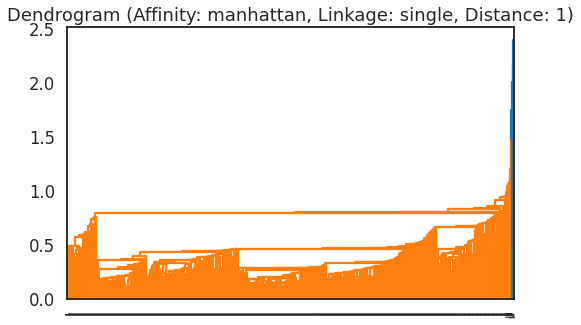

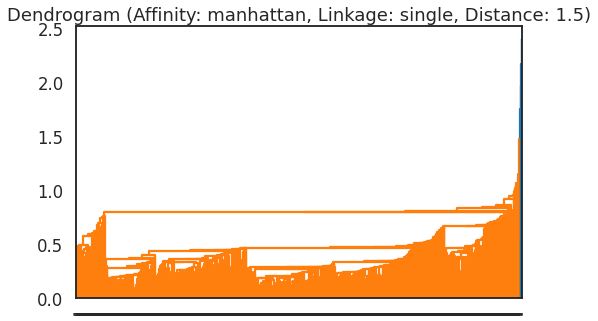

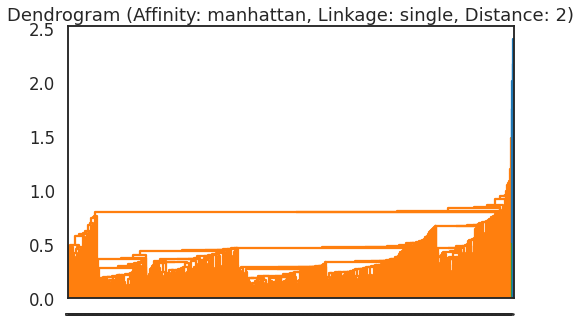

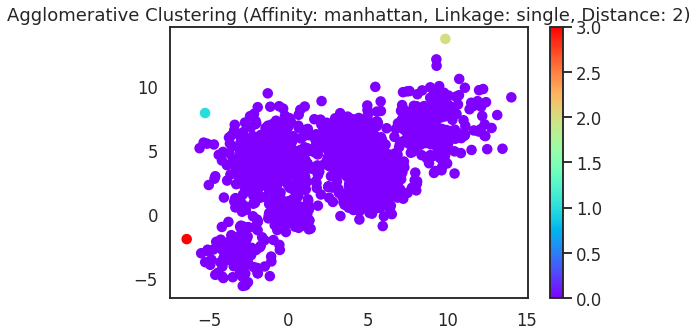

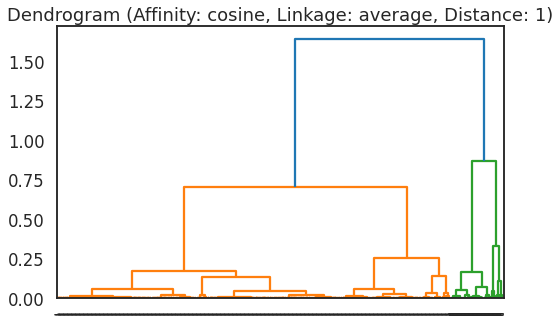

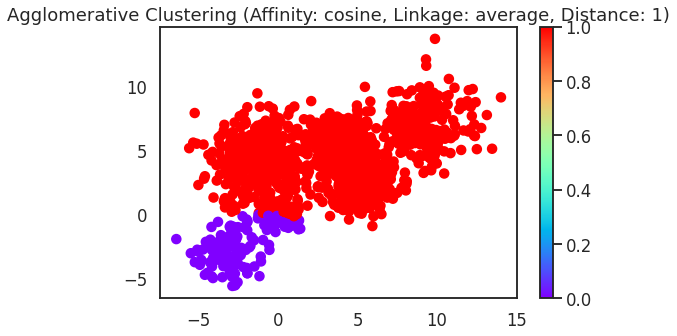

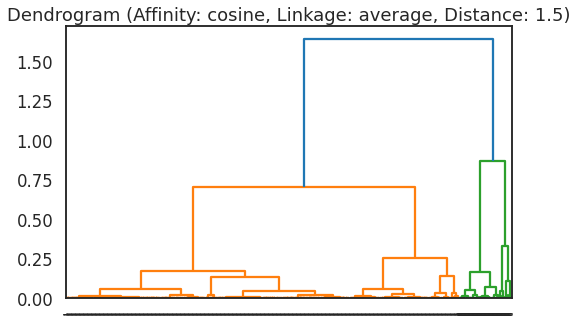

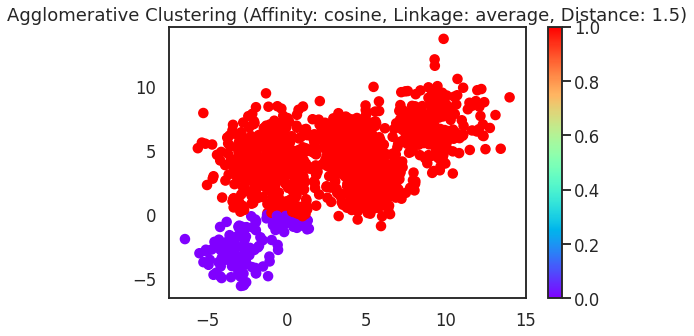

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
import itertools
agg = AgglomerativeClustering(n_clusters=6)
labels = agg.fit_predict(Multi_blob_Data)


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)


# Define parameters
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']
distances = [1, 1.5, 2, 3]

# Loop over different parameter combinations
best_score = -1
best_params = {}
for affinity, linkage, distance in itertools.product(affinities, linkages, distances):
    # Create clustering model
    if distance is None:
        model = AgglomerativeClustering(n_clusters=6, affinity=affinity, linkage=linkage)
    else:
        model = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage, distance_threshold=distance)

    # Fit model and get labels
    labels = model.fit_predict(Multi_blob_Data)

    # Check number of unique labels
    if len(np.unique(labels)) < 2:
        continue

    # Plot dendrogram
    plt.figure(figsize=(8, 5))
    plt.title(f"Dendrogram (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance})")
    plot_dendrogram(model, labels=labels)

    # Calculate silhouette score and display
    score = silhouette_score(Multi_blob_Data, labels)
    print(f"Silhouette score (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance}): {score:.3f}")

    # Update best score and params if applicable
    if score > best_score:
        best_score = score
        best_params = {'affinity': affinity, 'linkage': linkage, 'distance_threshold': distance}

    # Plot clusters
    plt.figure(figsize=(8, 5))
    plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='rainbow')
    plt.colorbar()
    plt.title(f"Agglomerative Clustering (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance})")

print("Best Silhouette Score: ", best_score)
print("Best Parameters: ", best_params)


est Parameters:  {'affinity': 'euclidean', 'linkage': 'average', 'distance_threshold': 3} with Best Silhouette Score:  0.35500586075131524

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

The best parameter combination is eps=0.8 and min_samples=8, with a silhouette score of 0.3051951203876005
Number of clusters: 2


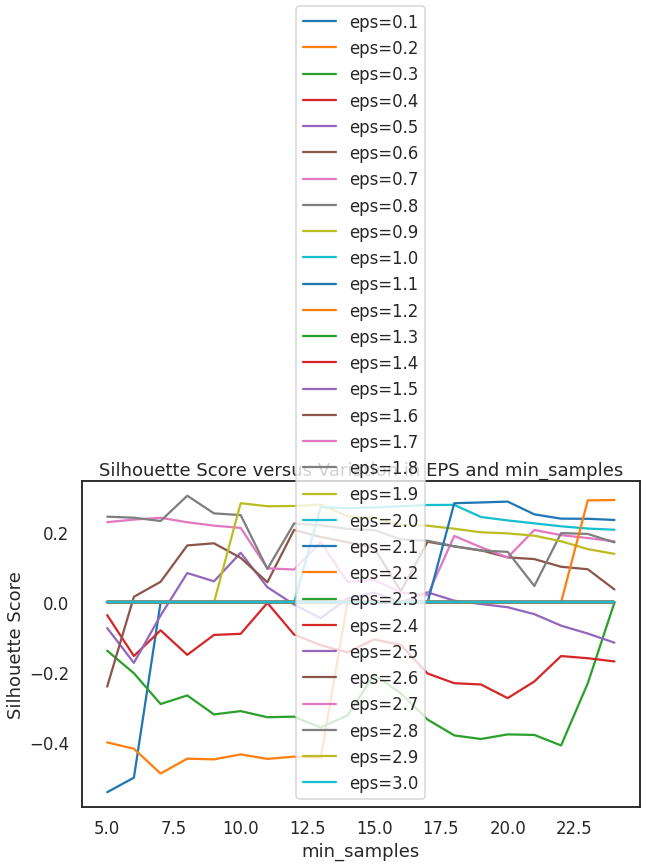

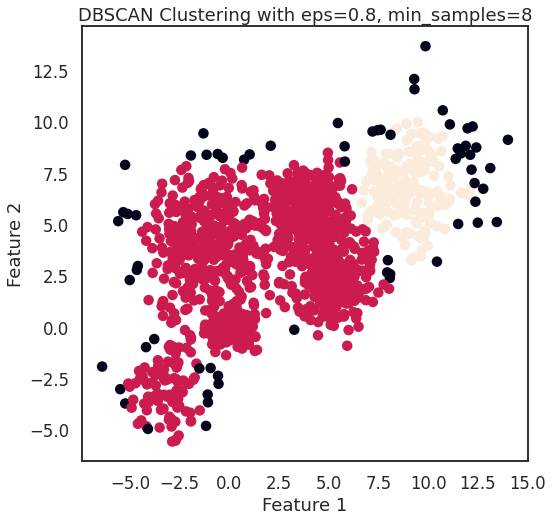

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Generate some data

Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)

eps_range = np.arange(0.1, 3.1, 0.1)
min_samples_range = range(5, 25)
silhouette_scores = np.zeros((len(eps_range), len(min_samples_range)))

# Compute silhouette scores for all combinations of eps and min_samples
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_samples_range):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(Multi_blob_Data)
        labels = dbscan.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0) # exclude noisy points if any
        if n_clusters > 1:
            score = silhouette_score(Multi_blob_Data, labels)
            silhouette_scores[i, j] = score

# Plot the silhouette scores versus the variation in eps and min_samples
fig, ax = plt.subplots(figsize=(10, 6))
for i, eps in enumerate(eps_range):
    ax.plot(min_samples_range, silhouette_scores[i], label=f"eps={eps:.1f}")
ax.legend()
ax.set_xlabel("min_samples")
ax.set_ylabel("Silhouette Score")
ax.set_title("Silhouette Score versus Variation in EPS and min_samples")

# Find the indices of the maximum silhouette score
idx = np.unravel_index(np.argmax(silhouette_scores, axis=None), silhouette_scores.shape)
best_eps, best_min_samples = eps_range[idx[0]], min_samples_range[idx[1]]
print(f"The best parameter combination is eps={best_eps:.1f} and min_samples={best_min_samples}, with a silhouette score of {silhouette_scores[idx]}")

# Fit DBSCAN with the best parameter combination
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(Multi_blob_Data)
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0) # exclude noisy points if any
print(f"Number of clusters: {n_clusters}")

# Plot the resulting clusters
plt.figure(figsize=(8,8))
plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=labels)
plt.title(f"DBSCAN Clustering with eps={best_eps:.1f}, min_samples={best_min_samples}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


The silhouette score compares how similar an object is to its own cluster to other clusters. The best score is 1, which indicates that the object is very similar to its own cluster but very different from other clusters. The lowest possible score is -1, which indicates that the object is very different from its own cluster but very similar to other clusters.
According to our findings, the best set of parameters for this dataset were EPS=0.8 and Min samples=8, yielding a silhouette score of around 0.3.

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

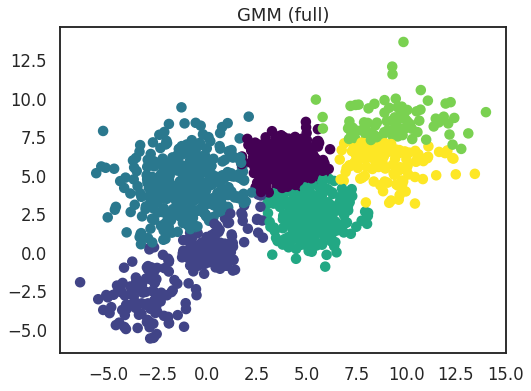

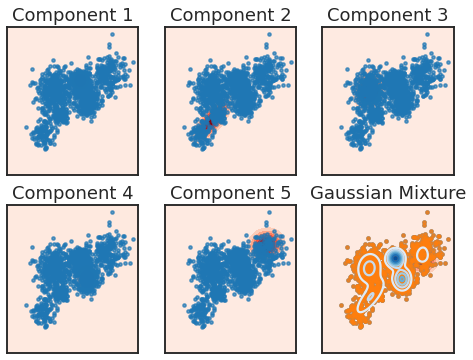

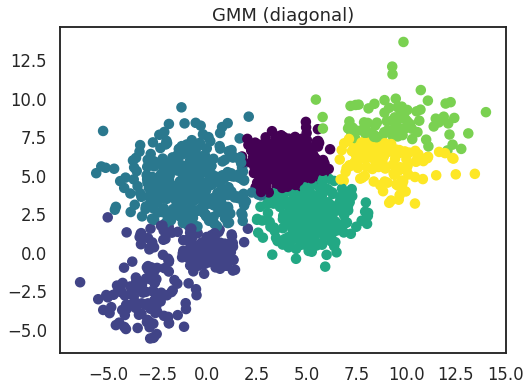

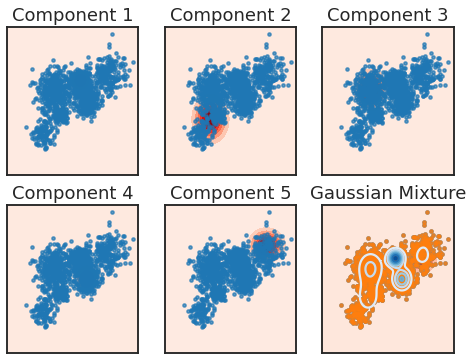

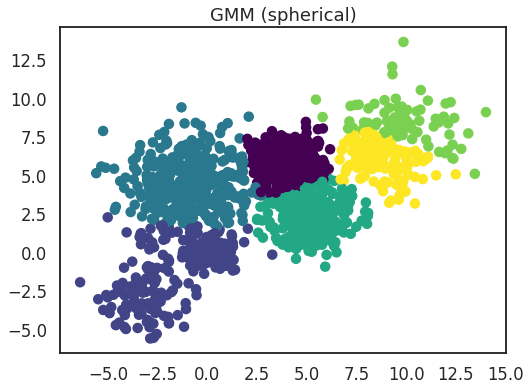

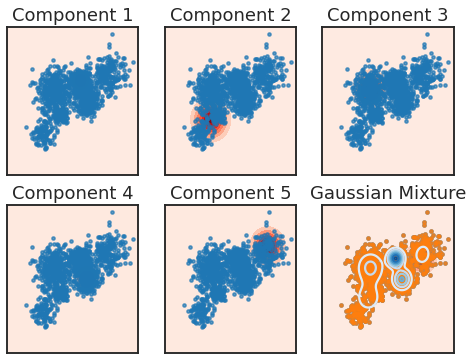

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

# Generate data
n_samples = [100, 150, 300, 400, 300, 200]
centers = [(-3, -3), (0, 0), (5, 2.5), (-1, 4), (4, 6), (9, 7)]
cluster_std = [1.3, 0.6, 1.2, 1.7, 0.9, 1.7]
Multi_blob_Data, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=cluster_std, centers=centers, shuffle=False, random_state=42)

# Fit GMM models
models = {
    'GMM (full)': GaussianMixture(n_components=6, covariance_type='full', random_state=42),
    'GMM (diagonal)': GaussianMixture(n_components=6, covariance_type='diag', random_state=42),
    'GMM (spherical)': GaussianMixture(n_components=6, covariance_type='spherical', random_state=42),
}

for name, model in models.items():
    model.fit(Multi_blob_Data)
    labels = model.predict(Multi_blob_Data)

    # Plot clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, cmap='viridis')
    plt.title(name)
    plt.show()

    # Plot GMM distributions
    plt.figure(figsize=(8, 6))
    for i, (mean, cov, weight) in enumerate(zip(model.means_, model.covariances_, model.weights_)):
        rv = multivariate_normal(mean, cov)
        plt.subplot(2, 3, i + 1)
        plt.contourf(X, Y, rv.pdf(pos), cmap='Reds')
        plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], s=10, alpha=0.7)
        plt.title(f'Component {i+1}')
        plt.xticks([])
        plt.yticks([])

    plt.subplot(2, 3, 6)
    plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], s=10, alpha=0.7)
    density = np.zeros_like(X)
    for i, (mean, cov, weight) in enumerate(zip(model.means_, model.covariances_, model.weights_)):
        rv = multivariate_normal(mean, cov)
        density += rv.pdf(pos) * weight
    plt.contour(X, Y, density, cmap='Blues')
    plt.title('Gaussian Mixture')
    plt.xticks([])
    plt.yticks([])

    plt.show()


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

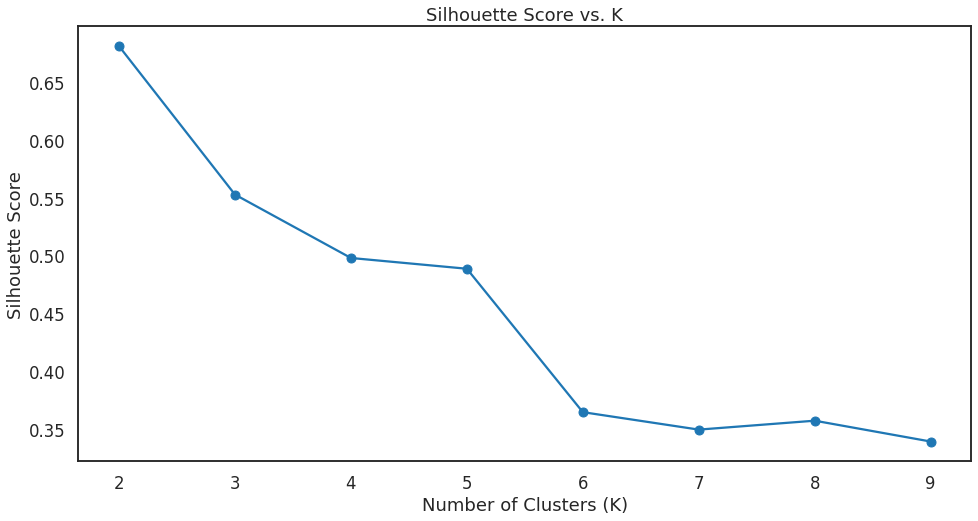

The best value of K is: 2
The silhouette score for the best K (2) is: 0.6810461692117462


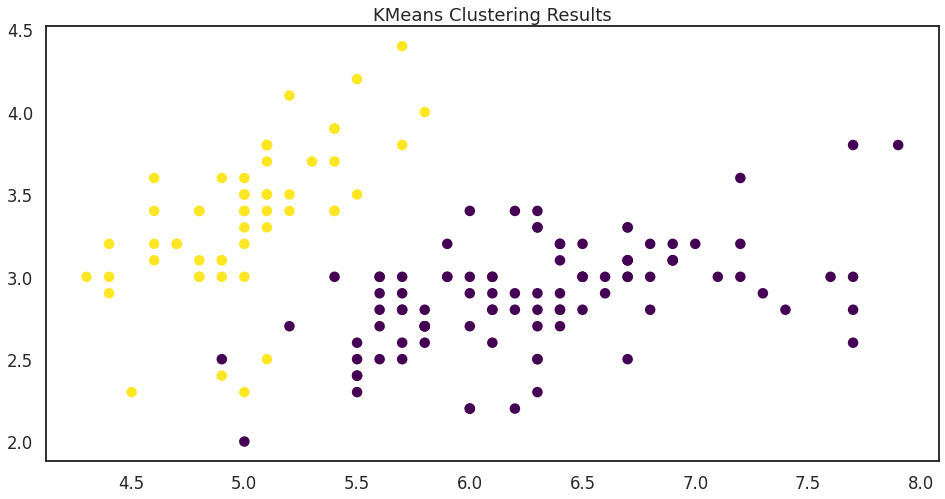

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Create a range of K values to test
k_range = range(1, 20)

# Initialize an empty list to store the inertia values for each K
inertia = []

# Loop over the range of K values and fit the KMeans model for each K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia values for each K
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Distortion Function vs. K')
plt.show()

# Set the range of K values to test
k_range = range(2, 10)

# Initialize empty lists to store silhouette scores and best K
silhouette_scores = []
best_k = None
best_silhouette_score = -1

# Loop over the range of K values and compute silhouette score for each
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    
    # Update best K and silhouette score if current score is higher
    if score > best_silhouette_score:
        best_k = k
        best_silhouette_score = score

# Plot the silhouette scores for each K
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. K')
plt.show()

# Print and store the silhouette score for the best K
print(f"The best value of K is: {best_k}")
print(f"The silhouette score for the best K ({best_k}) is: {best_silhouette_score}")
best_k_silhouette_score = best_silhouette_score

# best kmeans no.
n_clusters = 2

# Initialize the KMeans model with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("KMeans Clustering Results")
plt.show()


Silhouette score (Affinity: euclidean, Linkage: average, Distance: 1): 0.308
Silhouette score (Affinity: euclidean, Linkage: average, Distance: 1.5): 0.472
Silhouette score (Affinity: euclidean, Linkage: average, Distance: 2): 0.687
Silhouette score (Affinity: euclidean, Linkage: average, Distance: 3): 0.687
Silhouette score (Affinity: euclidean, Linkage: single, Distance: 1): 0.687
Silhouette score (Affinity: euclidean, Linkage: single, Distance: 1.5): 0.687
Silhouette score (Affinity: manhattan, Linkage: average, Distance: 1): 0.263
Silhouette score (Affinity: manhattan, Linkage: average, Distance: 1.5): 0.300
Silhouette score (Affinity: manhattan, Linkage: average, Distance: 2): 0.432
Silhouette score (Affinity: manhattan, Linkage: average, Distance: 3): 0.472
Silhouette score (Affinity: manhattan, Linkage: single, Distance: 1): 0.147
Silhouette score (Affinity: manhattan, Linkage: single, Distance: 1.5): 0.687
Silhouette score (Affinity: manhattan, Linkage: single, Distance: 2): 0.

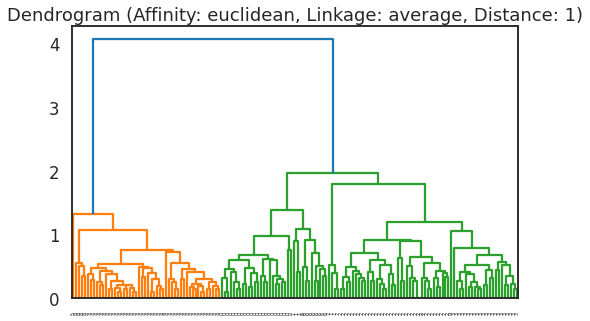

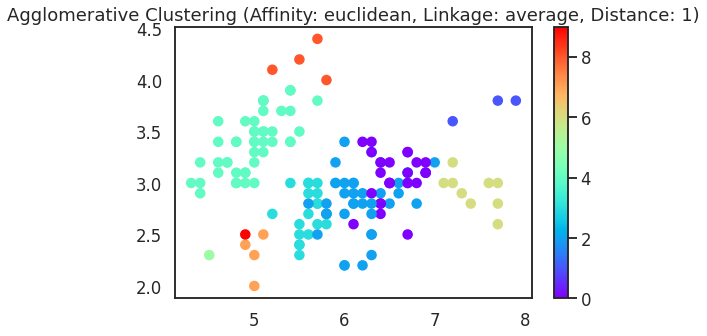

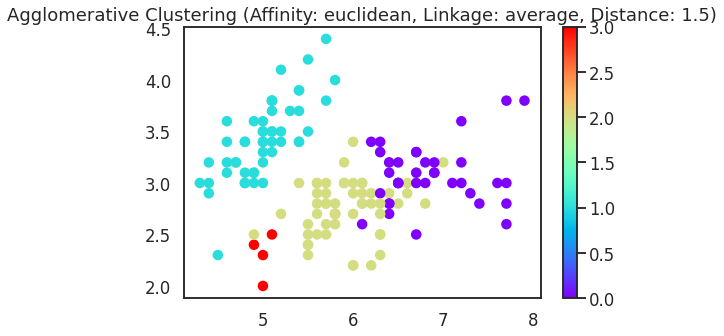

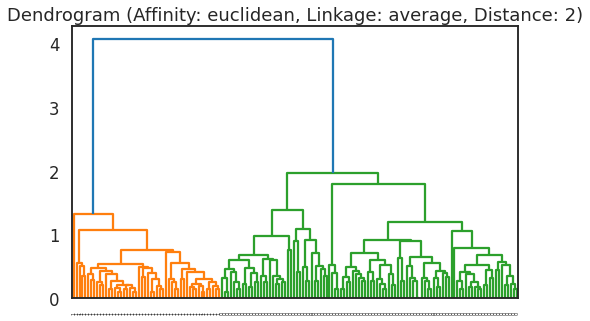

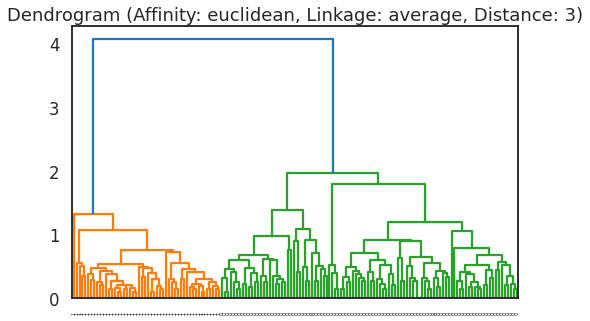

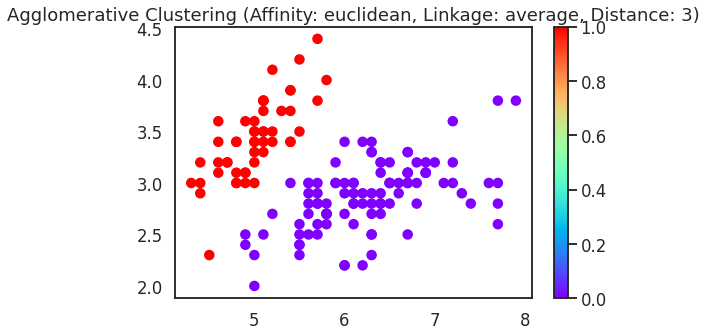

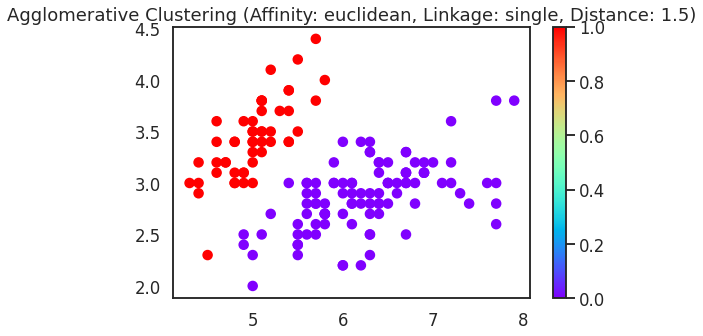

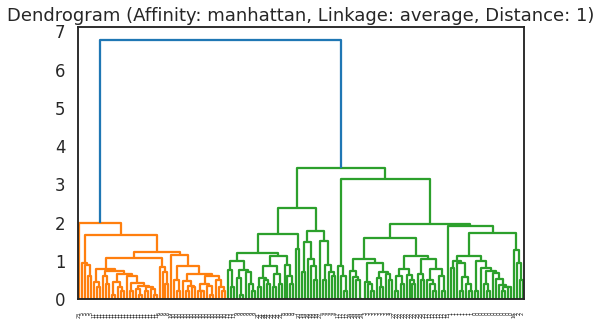

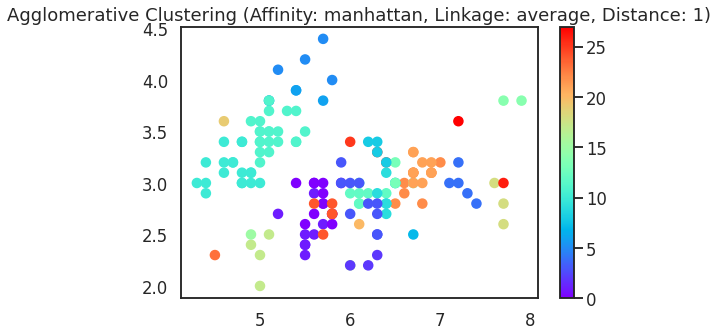

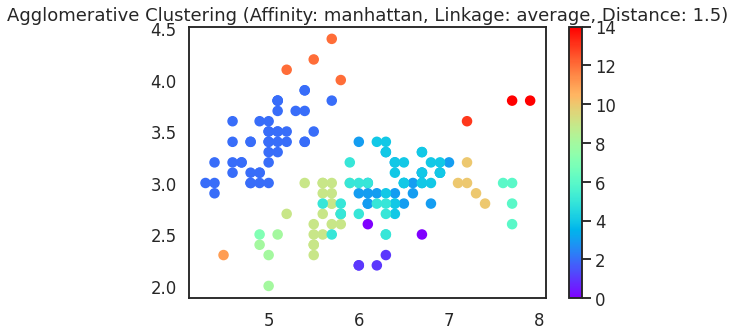

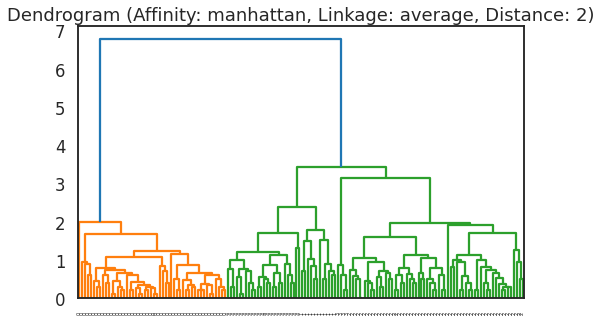

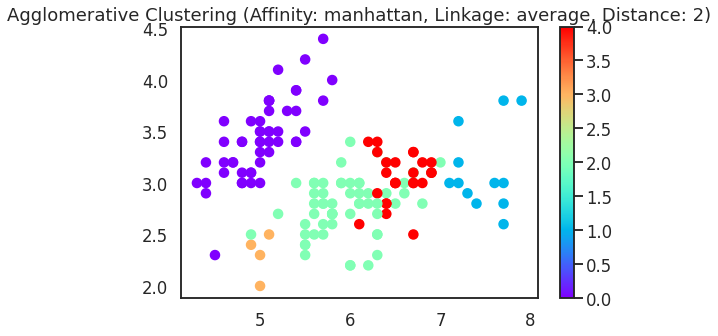

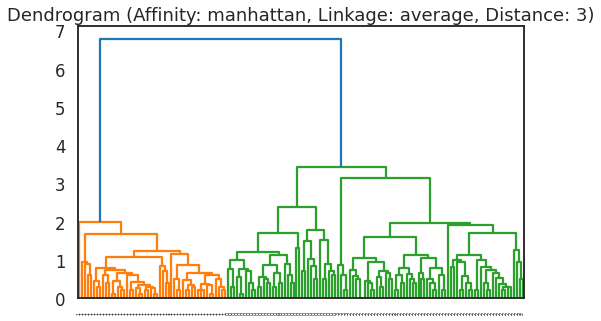

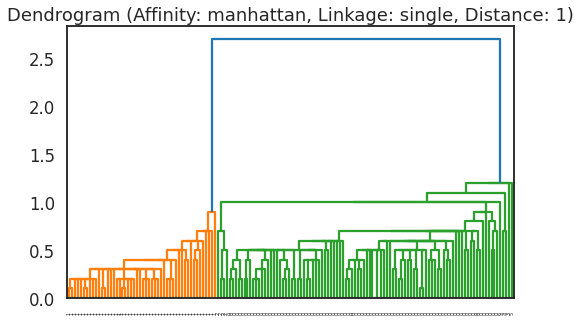

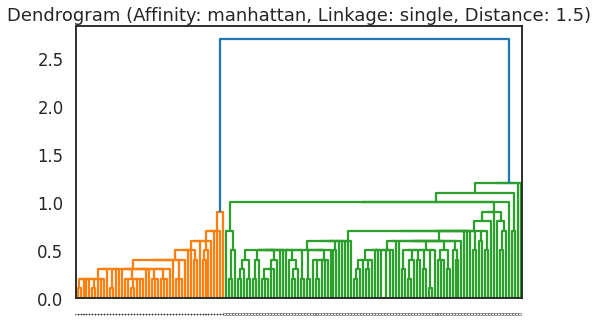

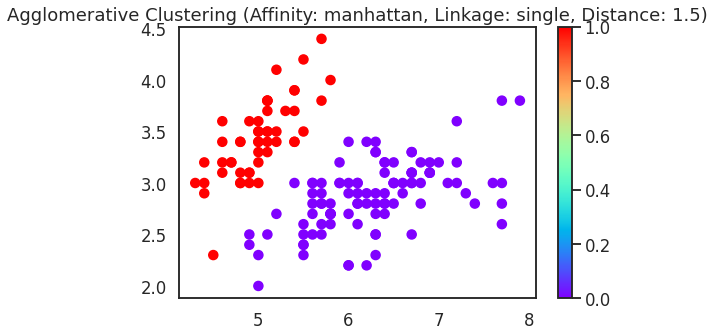

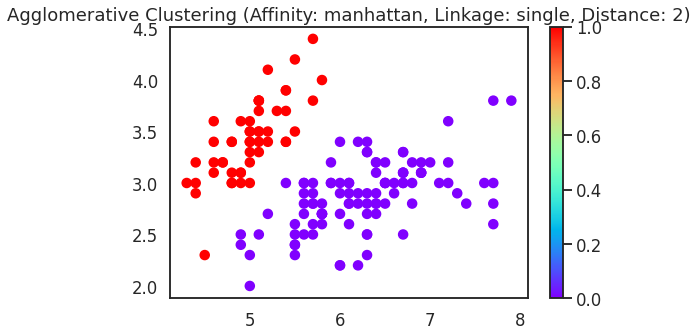

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

# Load Iris dataset
iris_data = load_iris()

# Define data and labels
X = iris_data.data
y = iris_data.target

# Define target names
target_names = iris_data.target_names

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)


# Define parameters
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']
distances = [1, 1.5, 2, 3]

# Loop over different parameter combinations
best_score = -1
best_params = {}
for affinity, linkage, distance in itertools.product(affinities, linkages, distances):
    # Create clustering model
    if distance is None:
        model = AgglomerativeClustering(n_clusters=3, affinity=affinity, linkage=linkage)
    else:
        model = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage, distance_threshold=distance)

    # Fit model and get labels
    labels = model.fit_predict(X)

    # Check number of unique labels
    if len(np.unique(labels)) < 2:
        continue

    # Plot dendrogram
    plt.figure(figsize=(8, 5))
    plt.title(f"Dendrogram (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance})")
    plot_dendrogram(model, labels=labels)

    # Calculate silhouette score and display
    score = silhouette_score(X, labels)
    print(f"Silhouette score (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance}): {score:.3f}")

    # Update best score and params if applicable
    if score > best_score:
        best_score = score
        best_params = {'affinity': affinity, 'linkage': linkage, 'distance_threshold': distance}

    # Plot clusters
    plt.figure(figsize=(8, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
    plt.colorbar()
    plt.title(f"Agglomerative Clustering (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance})")

print("Best Silhouette Score: ", best_score)
print("Best Parameters: ", best_params)


The best parameter combination is eps=0.9 and min_samples=2, with a silhouette score of 0.6867350732769777
Number of clusters: 2


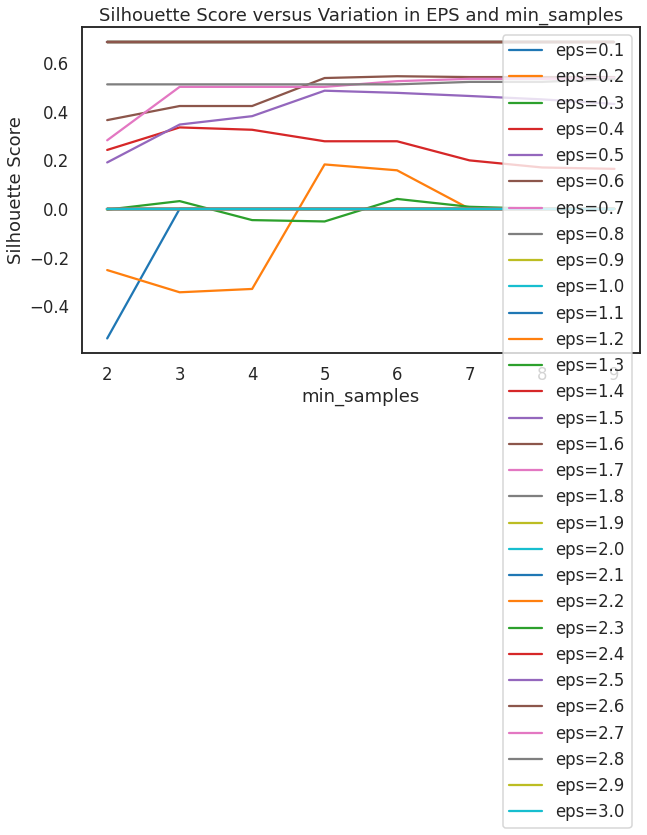

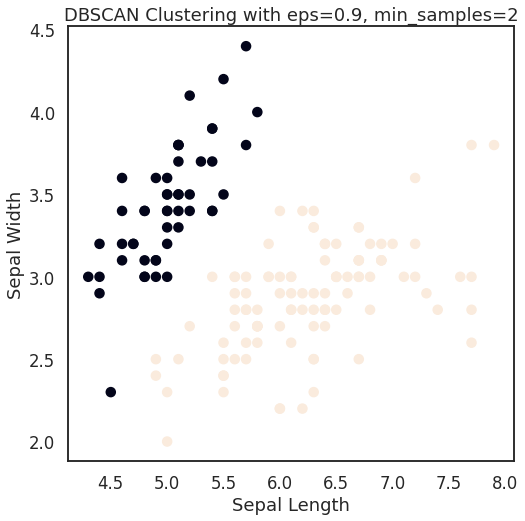

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Load the iris dataset
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

eps_range = np.arange(0.1, 3.1, 0.1)
min_samples_range = range(2, 10)
silhouette_scores = np.zeros((len(eps_range), len(min_samples_range)))

# Compute silhouette scores for all combinations of eps and min_samples
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_samples_range):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        labels = dbscan.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0) # exclude noisy points if any
        if n_clusters > 1:
            score = silhouette_score(X, labels)
            silhouette_scores[i, j] = score

# Plot the silhouette scores versus the variation in eps and min_samples
fig, ax = plt.subplots(figsize=(10, 6))
for i, eps in enumerate(eps_range):
    ax.plot(min_samples_range, silhouette_scores[i], label=f"eps={eps:.1f}")
ax.legend()
ax.set_xlabel("min_samples")
ax.set_ylabel("Silhouette Score")
ax.set_title("Silhouette Score versus Variation in EPS and min_samples")

# Find the indices of the maximum silhouette score
idx = np.unravel_index(np.argmax(silhouette_scores, axis=None), silhouette_scores.shape)
best_eps, best_min_samples = eps_range[idx[0]], min_samples_range[idx[1]]
print(f"The best parameter combination is eps={best_eps:.1f} and min_samples={best_min_samples}, with a silhouette score of {silhouette_scores[idx]}")

# Fit DBSCAN with the best parameter combination
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(X)
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0) # exclude noisy points if any
print(f"Number of clusters: {n_clusters}")

# Plot the resulting clusters
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=labels)
plt.title(f"DBSCAN Clustering with eps={best_eps:.1f}, min_samples={best_min_samples}")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


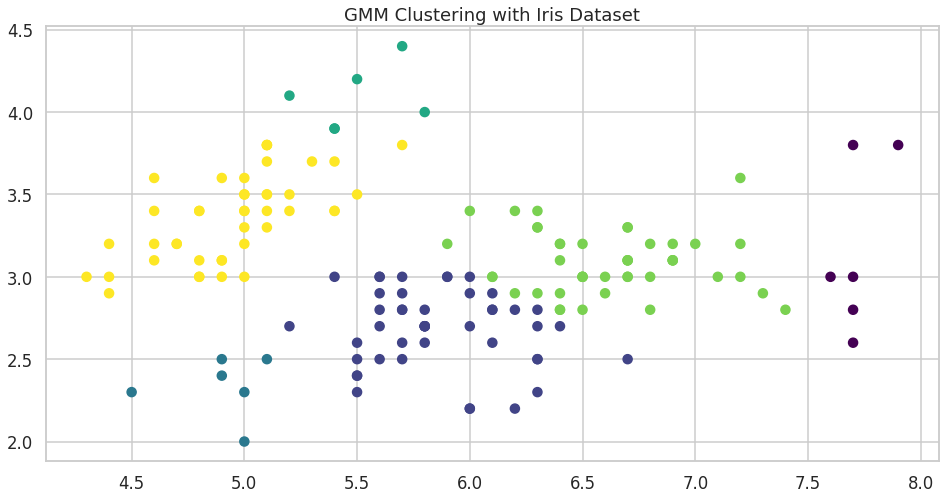

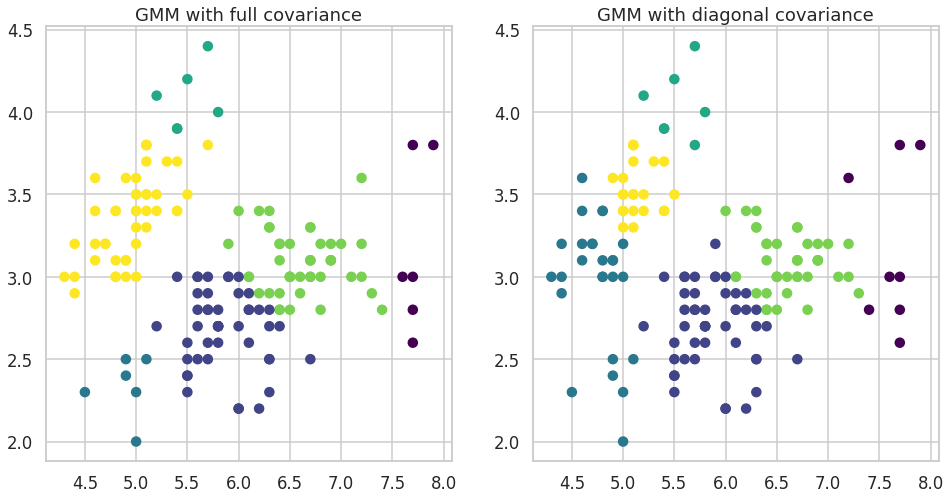

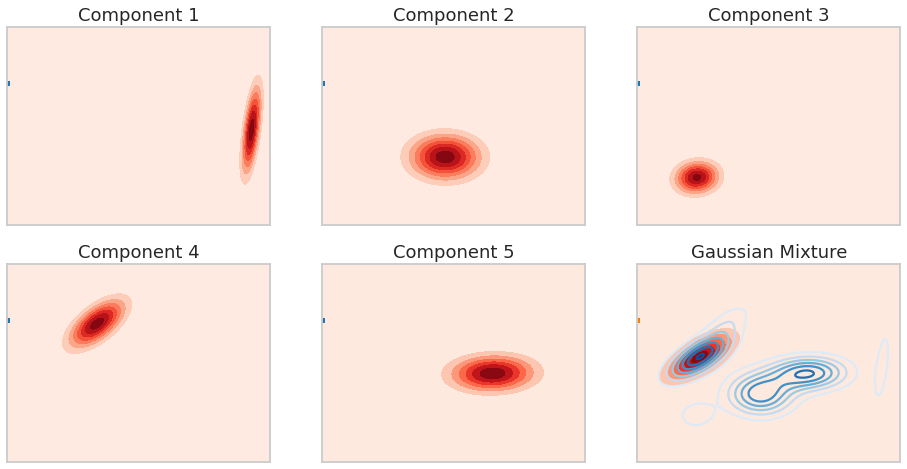

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris

# Load iris dataset
iris_data = load_iris()

# Use first two features for clustering
X = iris_data.data[:, :2]

# Instantiate the model with the number of clusters
n_clusters = 6
model = GaussianMixture(n_components=n_clusters, random_state=42)

# Fit the model to the data
model.fit(X)

# Get the cluster labels
labels = model.predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("GMM Clustering with Iris Dataset")
plt.show()

# Fit GMM with full covariance
gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=42)
y_pred_full = gmm.fit_predict(X)

# Fit GMM with diagonal covariance
gmm = GaussianMixture(n_components=6, covariance_type='diag', random_state=42)
y_pred_diag = gmm.fit_predict(X)

# Plot the probability fit for each covariance type
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_full, cmap='viridis')
plt.title("GMM with full covariance")

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_diag, cmap='viridis')
plt.title("GMM with diagonal covariance")
plt.show()

# fit GMM
gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=42)
gmm.fit(X)

# plot the resulting distribution and the total Gaussian mixture
x, y = np.linspace(4, 8, 500), np.linspace(1.5, 5, 500)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

plt.figure()
plt.rcParams['figure.figsize'] = [16, 8]

for i, (mean, cov, weight) in enumerate(zip(gmm.means_, gmm.covariances_, gmm.weights_)):
    plt.subplot(2, 3, i+1)
    rv = multivariate_normal(mean, cov)
    plt.contourf(X, Y, rv.pdf(pos), cmap='Reds')
    plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.7)
    plt.title(f'Component {i+1}')
    plt.xticks([])
    plt.yticks([])

plt.subplot(2, 3, 6)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.7)
density = np.zeros_like(X)
for i, (mean, cov, weight) in enumerate(zip(gmm.means_, gmm.covariances_, gmm.weights_)):
    rv = multivariate_normal(mean, cov)
    density += rv.pdf(pos) * weight
plt.contour(X, Y, density, cmap='Blues')
plt.title('Gaussian Mixture')
plt.xticks([])
plt.yticks([])

plt.show()


## Customer dataset
Repeat all the above on the customer data set 

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
# Load the dataset into a pandas DataFrame
df = pd.read_csv('Customer data (1).csv')

# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)
df = pd.read_csv('Customer data (1).csv')
df = df.iloc[:, 1:]
df_norm = pd.DataFrame(np.linalg.norm(df, axis=0), index=df.columns).T
df_norm = pd.concat([df_norm, df], axis=0)
df_norm = df_norm.apply(lambda x: x/np.linalg.norm(x), axis=1)
# Normalize the data using StandardScaler
scaler = StandardScaler()
df_norm = scaler.fit_transform(df)
print(df_norm)

[[-0.91739884 -0.99302433  2.65361447 ...  0.09752361  0.29682303
   1.552326  ]
 [ 1.09003844  1.00702467 -1.18713209 ...  0.78265438  0.29682303
   1.552326  ]
 [-0.91739884 -0.99302433  1.11731585 ... -0.83320224 -1.26952539
  -0.90972951]
 ...
 [-0.91739884 -0.99302433 -0.41898277 ... -0.90695688 -1.26952539
  -0.90972951]
 [ 1.09003844  1.00702467 -1.01643224 ... -0.60332923 -1.26952539
  -0.90972951]
 [-0.91739884 -0.99302433 -0.93108232 ... -1.3789866  -1.26952539
  -0.90972951]]


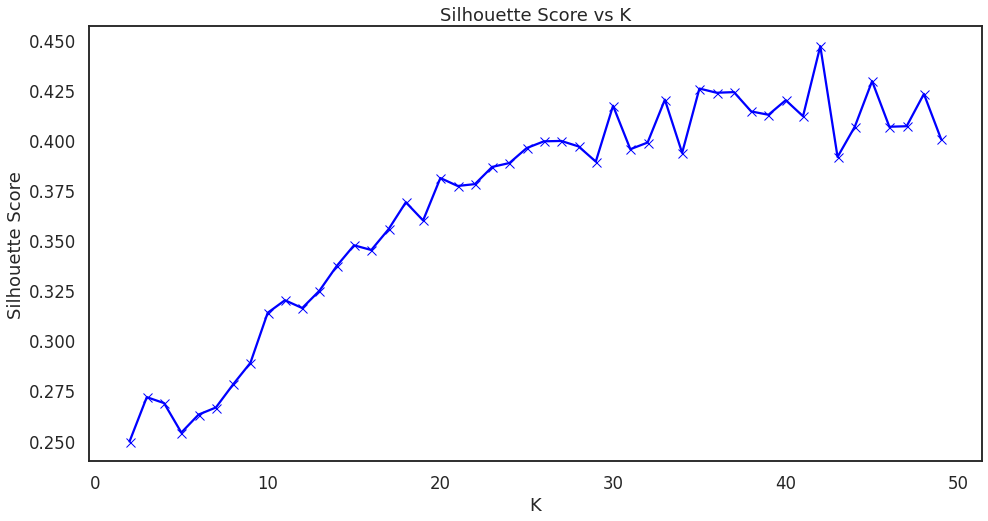

For K = 42 Silhouette score is 0.45
Cluster centers for K = 42
[[-0.91739884  1.00702467 -0.46007718 -0.06337243  0.65247311  1.86317144
   0.50367273]
 [ 1.09003844  1.00702467 -0.67557618 -0.06337243 -0.21125736  0.29682303
  -0.90972951]
 [-0.91739884 -0.99302433  0.40606649 -0.06337243  0.01415624  0.29682303
  -0.90972951]
 [-0.91739884 -0.99302433  0.97316931 -0.06337243  1.30926894  0.15759205
   0.67692849]
 [-0.91739884 -0.99302433  0.37123979 -0.06337243 -0.66531449 -1.26952539
  -0.77176951]
 [ 1.09003844  1.00702467  1.46440554  1.60432297  0.63734694  0.15759205
   0.04773652]
 [-0.91739884 -0.99302433 -0.68641254 -1.73106782  0.03415149  0.2185056
   1.552326  ]
 [ 1.09003844  1.00702467 -0.44818143 -0.06337243  0.8341507   0.21438363
   0.09452997]
 [-0.91739884 -0.99302433  0.47030836 -0.06337243  2.26259281  1.86317144
   1.27435199]
 [ 1.09003844  1.00702467 -0.67134174 -0.06337243 -0.9315437  -1.26952539
  -0.90972951]
 [-0.91739884  1.00702467 -0.56189427 -0.0633724

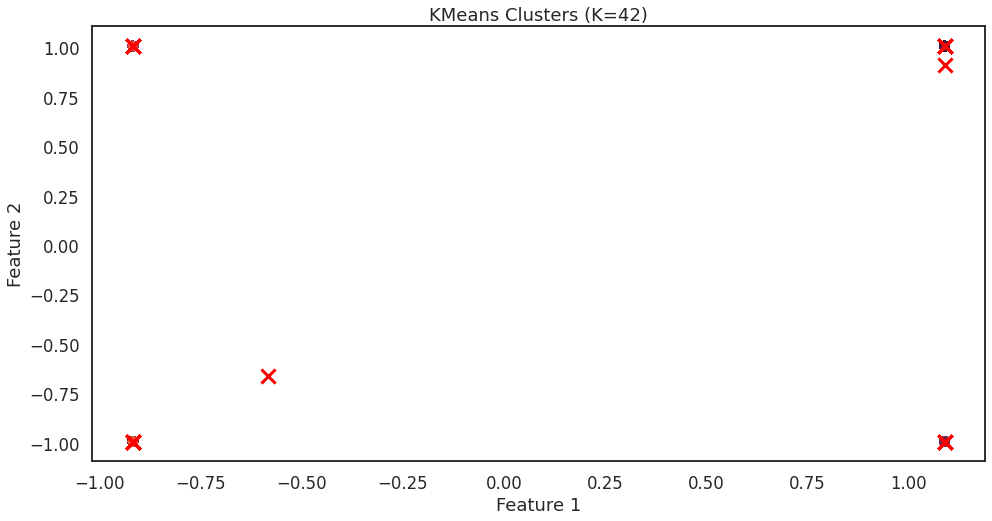

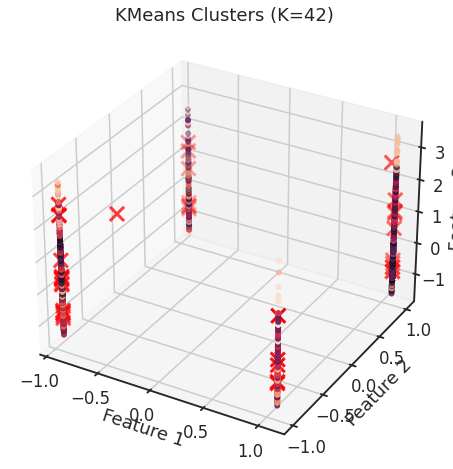

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load the dataset into a pandas DataFrame
df = pd.read_csv('Customer data (1).csv')

# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Normalize the data using StandardScaler
scaler = StandardScaler()
df_norm = scaler.fit_transform(df.iloc[:, 1:])

# Define a range of values for K
k_values = range(2, 50)

# Compute the silhouette score for each value of K
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_norm)
    silhouette_scores.append(silhouette_score(df_norm, labels))

# Plot the silhouette score versus K
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')
plt.show()

# Choose the best value of K based on the highest silhouette score
best_k = k_values[np.argmax(silhouette_scores)]

# Fit the KMeans model with the best value of K and display the outcome
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(df_norm)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
print("For K =", best_k, "Silhouette score is", round(max(silhouette_scores), 2))
print("Cluster centers for K =", best_k)
print(centers)
# Plot the KMeans clusters for the best value of K
plt.scatter(df_norm[:, 0], df_norm[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clusters (K={})'.format(best_k))
plt.show()
from mpl_toolkits.mplot3d import Axes3D

# Fit the KMeans model with the best value of K and display the outcome
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(df_norm)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot the KMeans clusters for the best value of K in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_norm[:, 0], df_norm[:, 1], df_norm[:, 2], c=labels)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='x', s=200, linewidths=3, color='r')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('KMeans Clusters (K={})'.format(best_k))
plt.show()



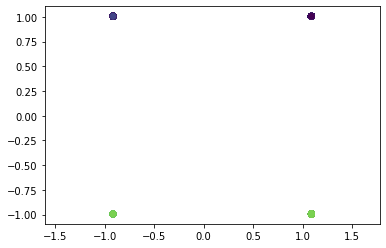

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: euclidean, Linkage: average, Distance: 1): 0.455


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: euclidean, Linkage: average, Distance: 1.5): 0.433


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: euclidean, Linkage: average, Distance: 2): 0.401


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: euclidean, Linkage: average, Distance: 3): 0.234


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: euclidean, Linkage: single, Distance: 1): 0.466


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: euclidean, Linkage: single, Distance: 1.5): 0.366


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: euclidean, Linkage: single, Distance: 2): 0.150


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: manhattan, Linkage: average, Distance: 1): 0.456


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: manhattan, Linkage: average, Distance: 1.5): 0.461


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: manhattan, Linkage: average, Distance: 2): 0.464


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-8-79b24d2e43f6>:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 5))


Silhouette score (Affinity: manhattan, Linkage: average, Distance: 3): 0.376


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: manhattan, Linkage: single, Distance: 1): 0.469


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: manhattan, Linkage: single, Distance: 1.5): 0.347


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: manhattan, Linkage: single, Distance: 2): 0.105


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: manhattan, Linkage: single, Distance: 3): 0.349


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: cosine, Linkage: average, Distance: 1): 0.257


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be remo

Silhouette score (Affinity: euclidean, Linkage: average, Distance: 1): 0.434


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: euclidean, Linkage: average, Distance: 1.5): 0.488


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: euclidean, Linkage: average, Distance: 2): 0.458


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: euclidean, Linkage: average, Distance: 3): 0.278


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: euclidean, Linkage: single, Distance: 1): 0.518


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: euclidean, Linkage: single, Distance: 1.5): 0.514


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: euclidean, Linkage: single, Distance: 2): 0.236


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: manhattan, Linkage: average, Distance: 1): 0.411


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: manhattan, Linkage: average, Distance: 1.5): 0.472


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: manhattan, Linkage: average, Distance: 2): 0.493


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: manhattan, Linkage: average, Distance: 3): 0.451


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: manhattan, Linkage: single, Distance: 1): 0.505


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: manhattan, Linkage: single, Distance: 1.5): 0.518


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: manhattan, Linkage: single, Distance: 2): 0.203


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score (Affinity: cosine, Linkage: average, Distance: 1): 0.255


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be remo

Best parameters: {'affinity': 'euclidean', 'linkage': 'single', 'distance_threshold': 1}
Best silhouette score: 0.518


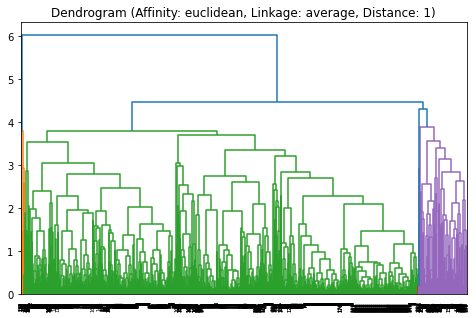

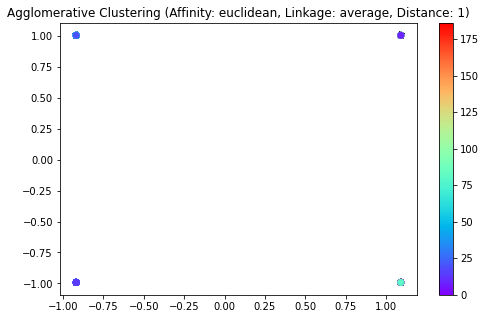

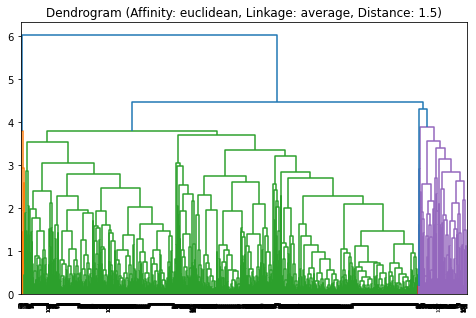

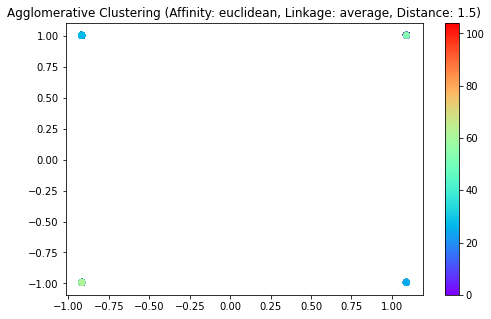

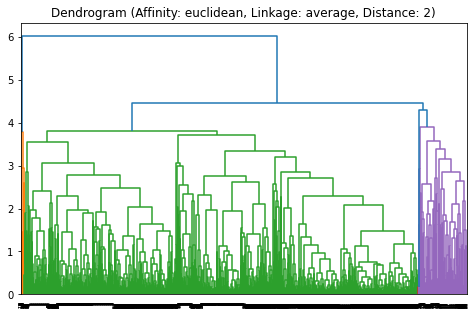

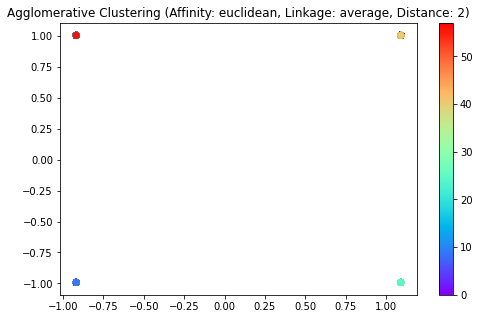

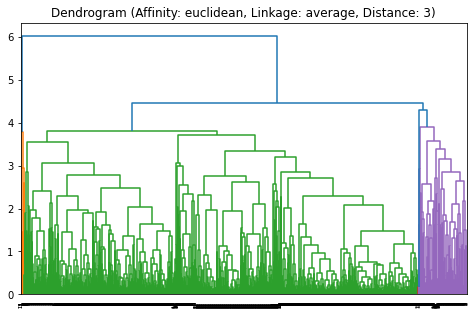

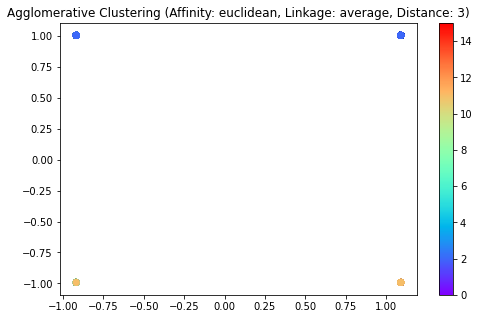

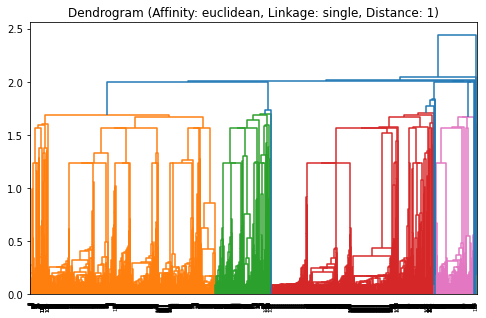

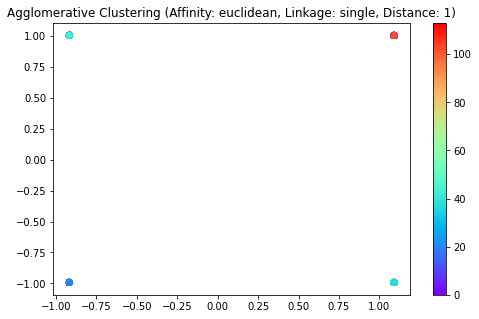

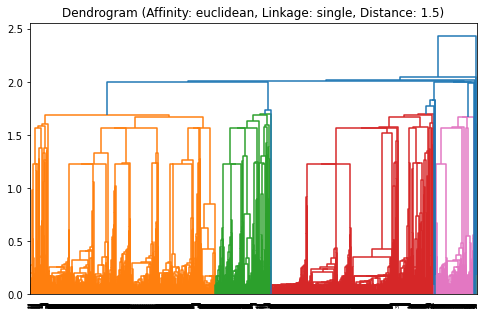

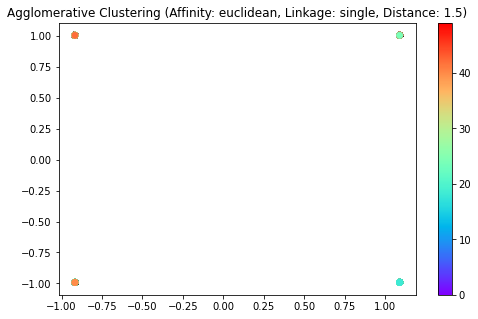

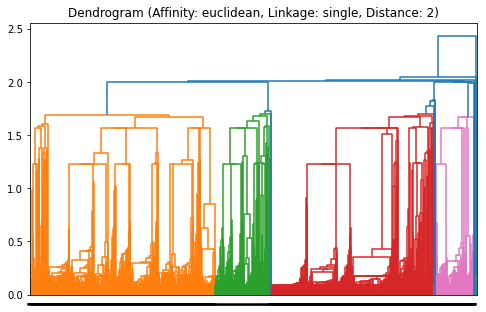

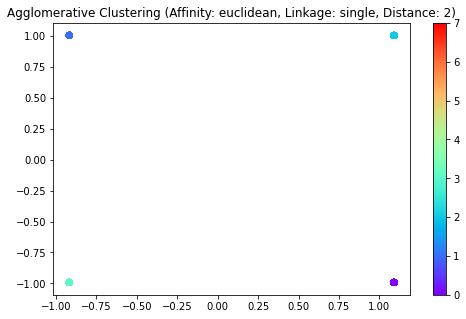

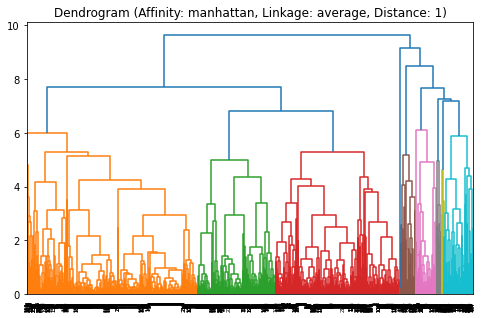

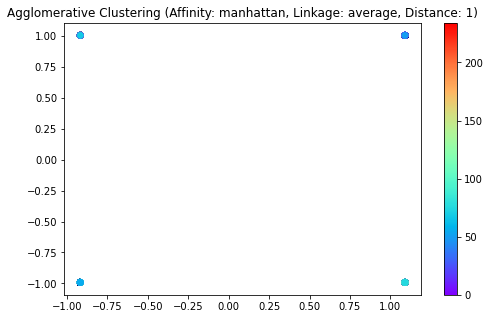

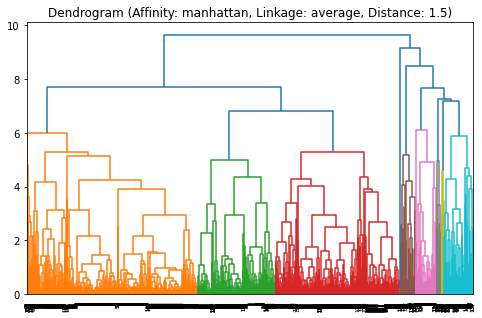

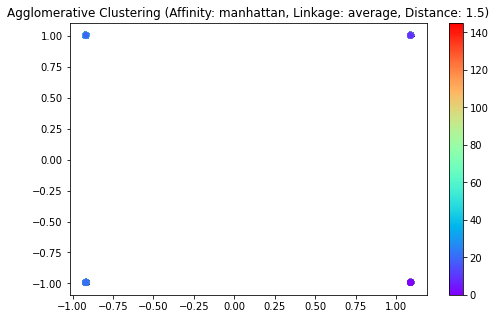

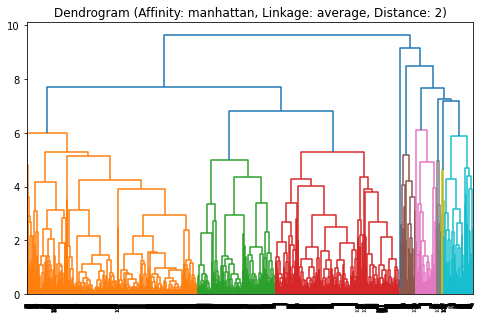

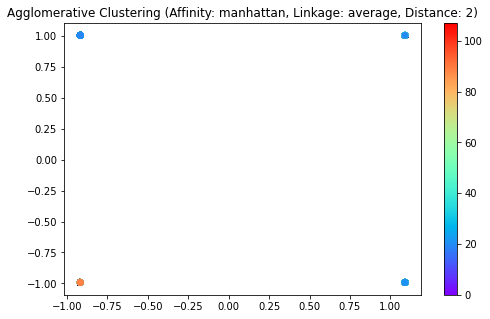

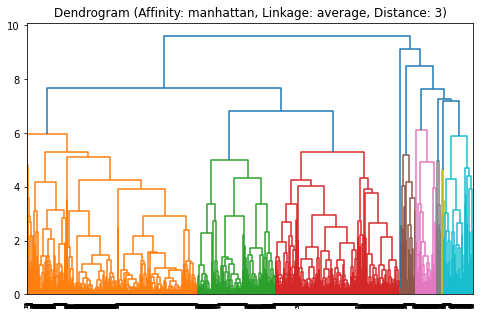

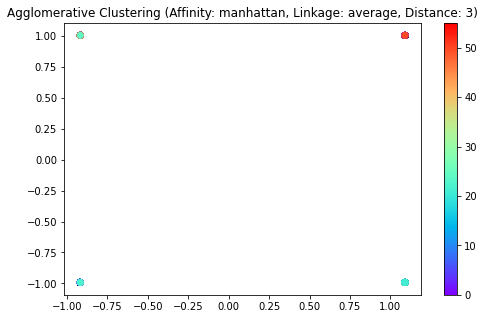

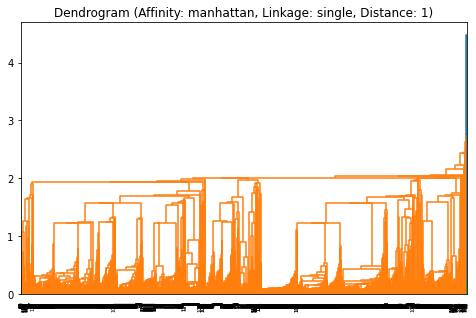

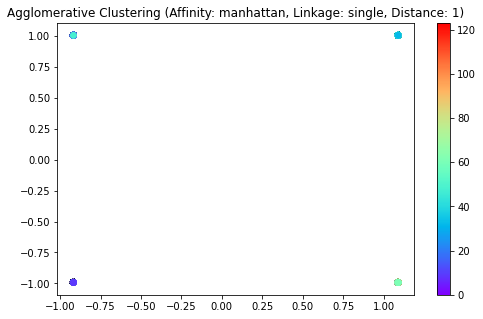

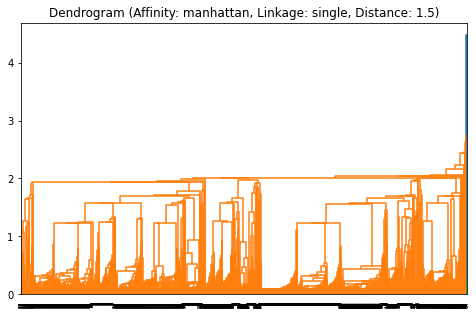

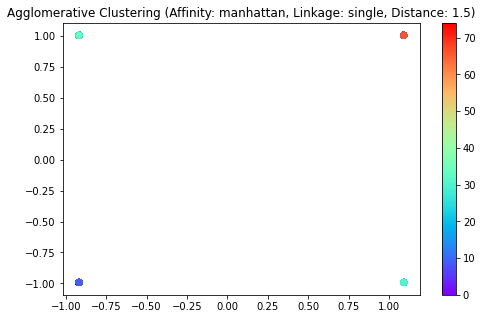

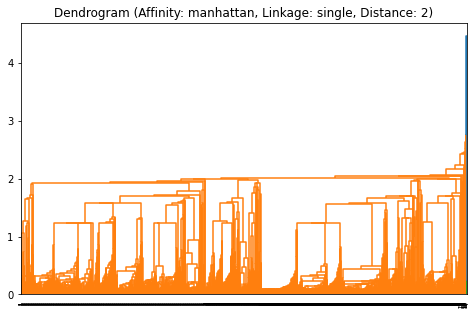

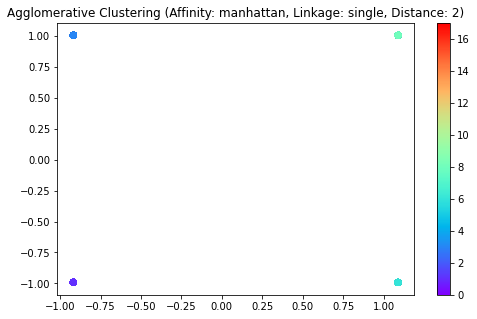

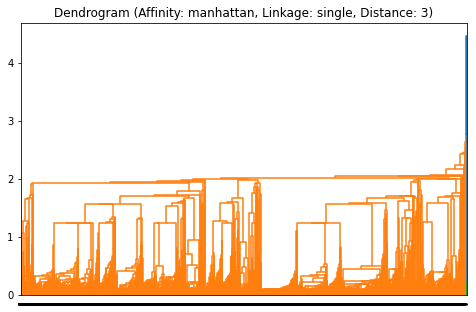

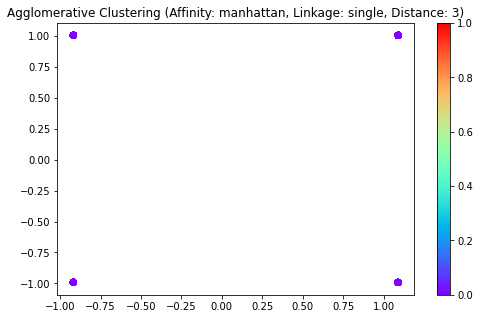

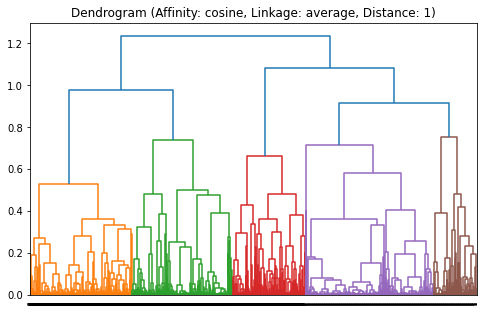

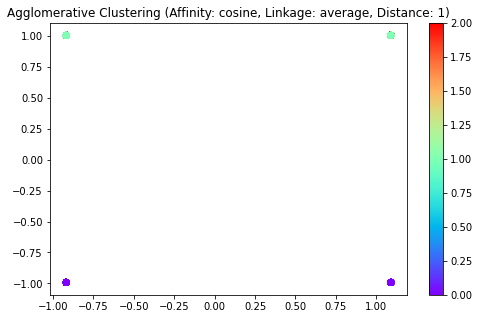

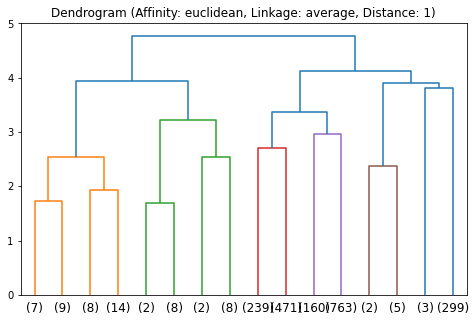

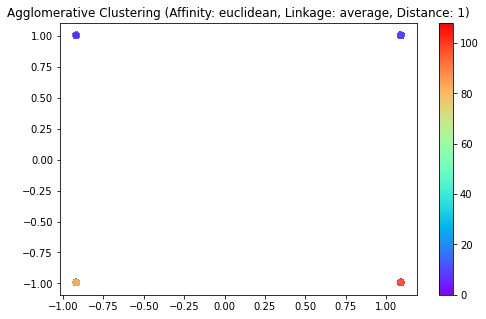

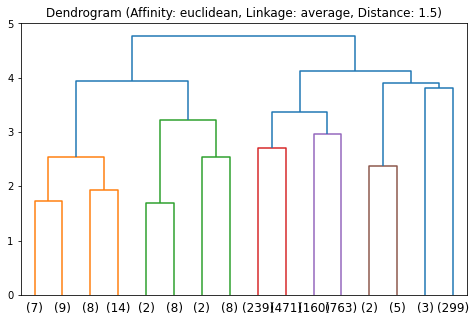

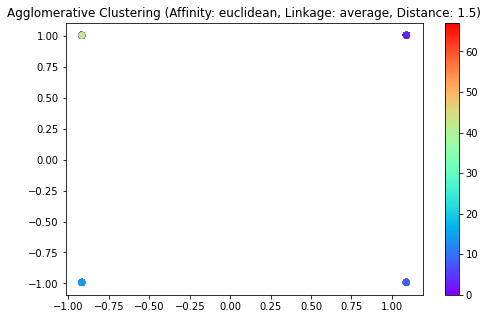

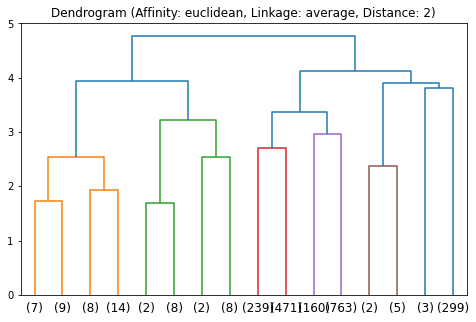

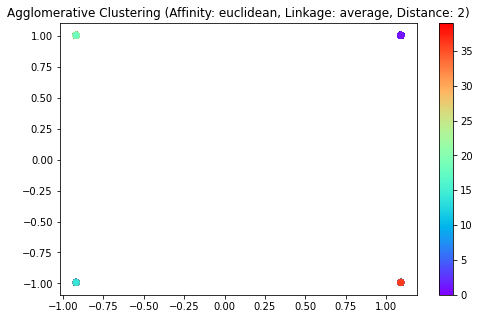

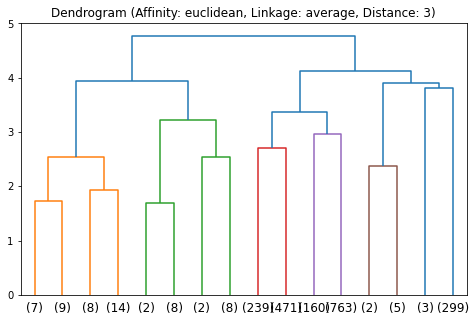

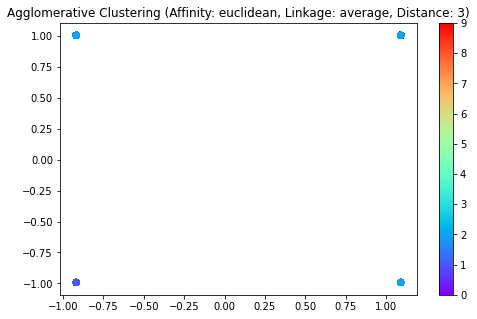

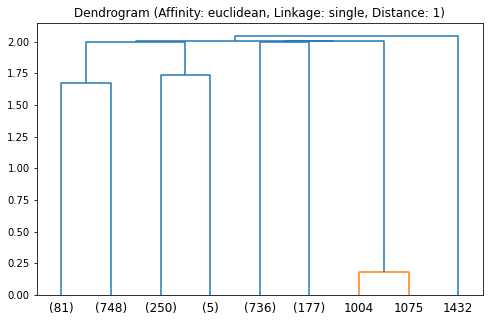

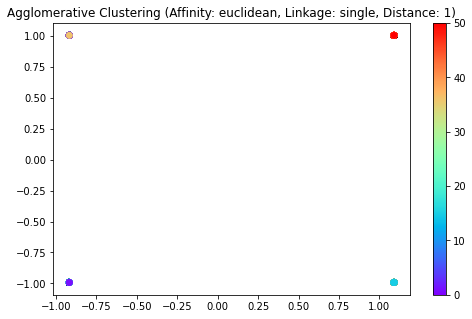

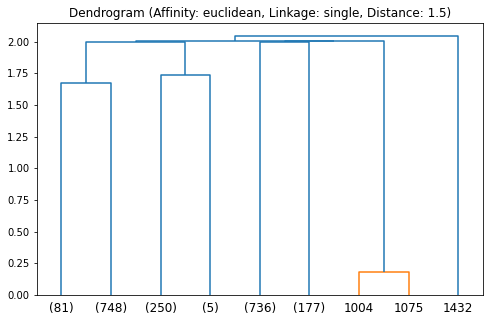

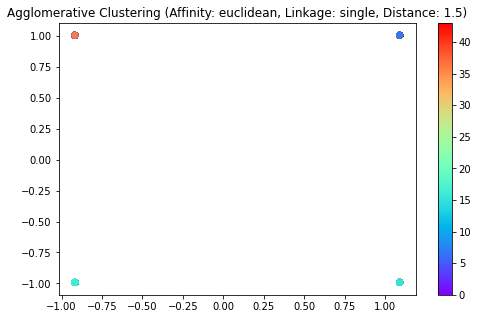

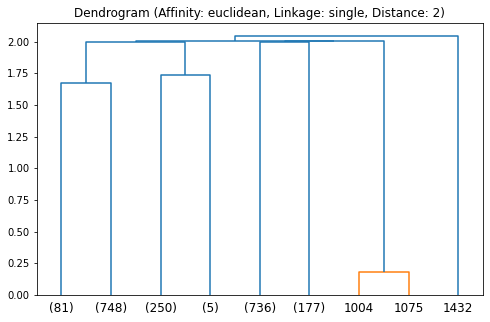

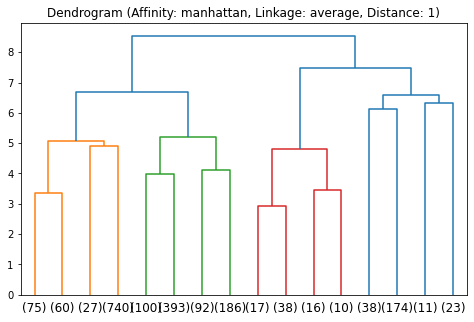

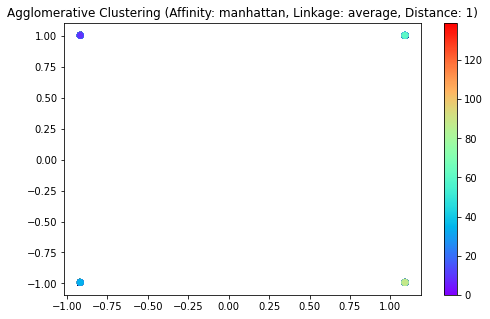

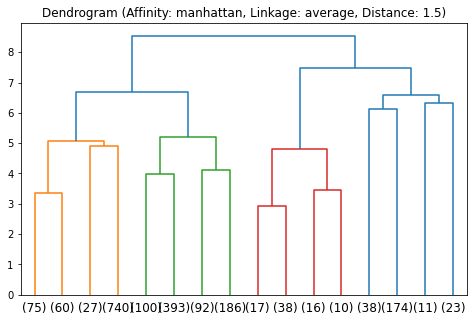

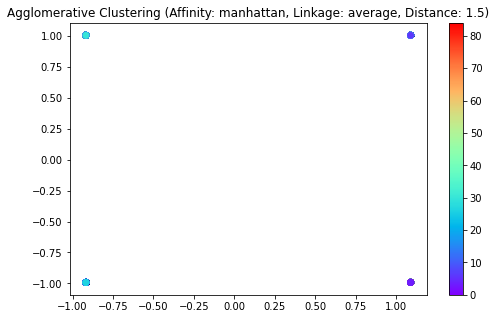

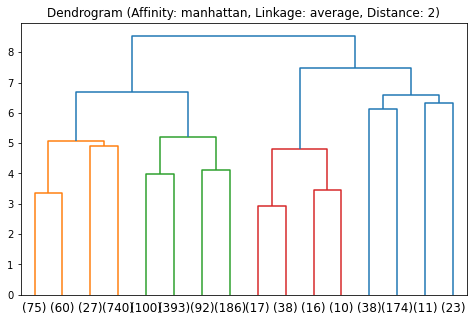

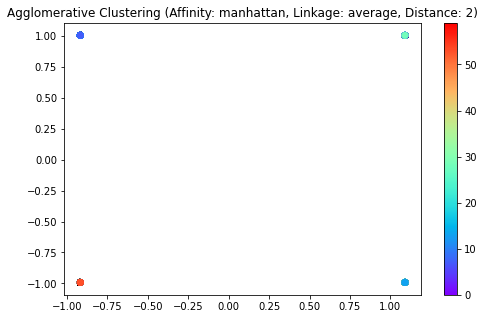

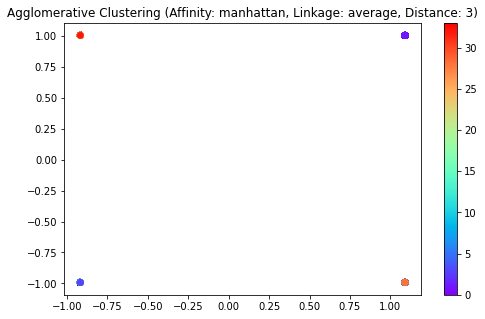

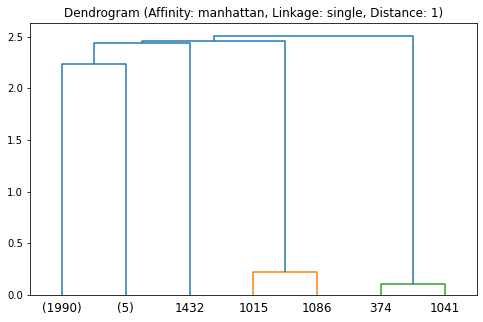

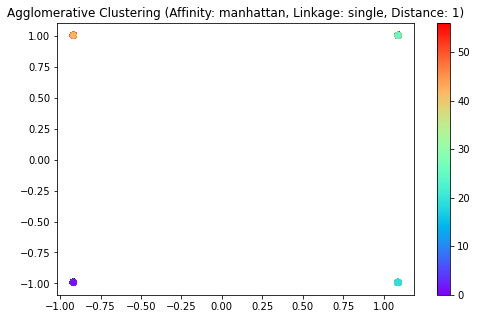

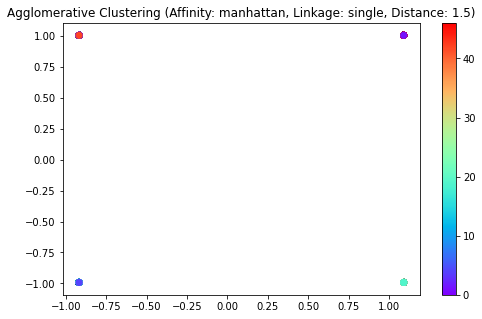

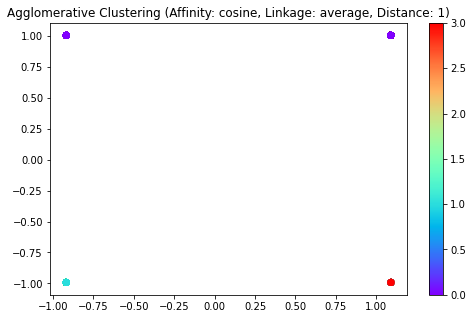

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram


df_norm 

def display_cluster(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.axis('equal')
    plt.show()

# Initialize the AgglomerativeClustering object
agg = AgglomerativeClustering(n_clusters=6)

# Fit the data to the model and predict the cluster labels
labels = agg.fit_predict(df_norm)

# Plot the clusters
display_cluster(df_norm[:, :2], labels)

#In the AgglomerativeClustering change the following parameters
##Linkage( use average and single )
#Distance_threshold (try different)
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

# Define parameters
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']
distances = [1, 1.5, 2, 3]

# Loop over different parameter combinations
best_score = -1
best_params = {}
for affinity in affinities:
    for linkage in linkages:
        for distance in distances:
            # Create clustering model
            if distance is None:
                model = AgglomerativeClustering(n_clusters=6, affinity=affinity, linkage=linkage)
            else:
                model = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage, distance_threshold=distance)

            # Fit model and get labels
            labels = model.fit_predict(df_norm)

            # Check number of unique labels
            if len(np.unique(labels)) < 2:
                continue

            # Plot dendrogram
            plt.figure(figsize=(8, 5))
            plt.title(f"Dendrogram (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance})")
            plot_dendrogram(model, labels=labels)

            # Plot clusters
            plt.figure(figsize=(8, 5))
            plt.scatter(df_norm[:, 0], df_norm[:, 1], c=labels, cmap='rainbow')
            plt.colorbar()
            plt.title(f"Agglomerative Clustering (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance})")

            # Calculate silhouette score and display
            score = silhouette_score(df_norm, labels)
            print(f"Silhouette score (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance}): {score:.3f}")

            # Update best score and params if applicable
            if score > best_score:
                best_score = score
                best_params = {'affinity': affinity, 'linkage': linkage, 'distance_threshold': distance}
                import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

# Load the data
data = df_norm
X = data[:, :-1]
y = data[:, -1]

# Normalize the data
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Define parameters
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']
distances = [1, 1.5, 2, 3]

# Loop over different parameter combinations
best_score = -1
best_params = {}
for affinity in affinities:
    for linkage in linkages:
        for distance in distances:
            # Create clustering model
            if distance is None:
                model = AgglomerativeClustering(n_clusters=6, affinity=affinity, linkage=linkage)
            else:
                model = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage, distance_threshold=distance)

            # Fit model and get labels
            labels = model.fit_predict(X)

            # Check number of unique labels
            if len(np.unique(labels)) < 2:
                continue

            # Plot dendrogram
            plt.figure(figsize=(8, 5))
            plt.title(f"Dendrogram (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance})")
            plot_dendrogram(model, truncate_mode='level', p=3)

            # Plot clusters
            plt.figure(figsize=(8, 5))
            plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
            plt.colorbar()
            plt.title(f"Agglomerative Clustering (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance})")

            # Calculate silhouette score and display
            score = silhouette_score(X, labels)
            print(f"Silhouette score (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance}): {score:.3f}")

            # Update best score and params if applicable
            if score > best_score:
                best_score = score
                best_params = {'affinity': affinity, 'linkage': linkage, 'distance_threshold': distance}
                
# Print the best parameters and silhouette score
print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score:.3f}")


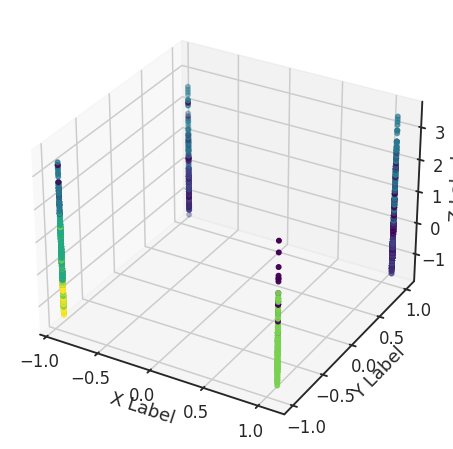

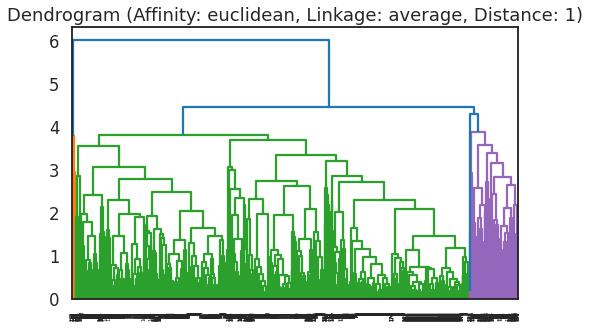

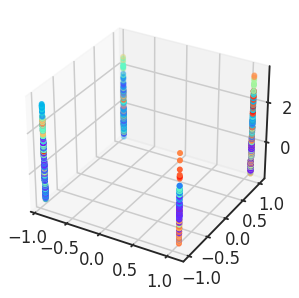

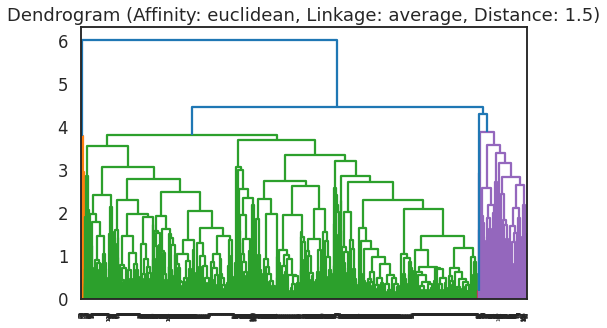

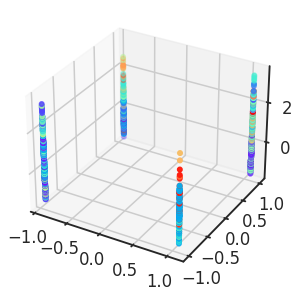

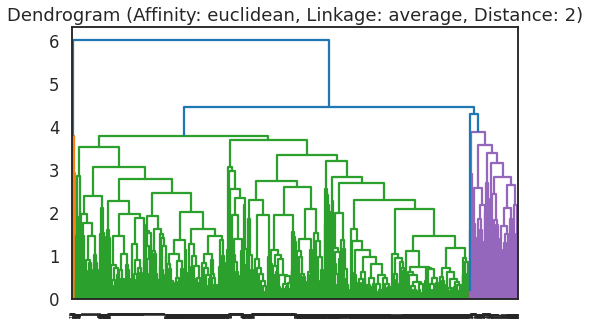

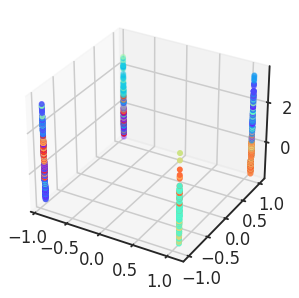

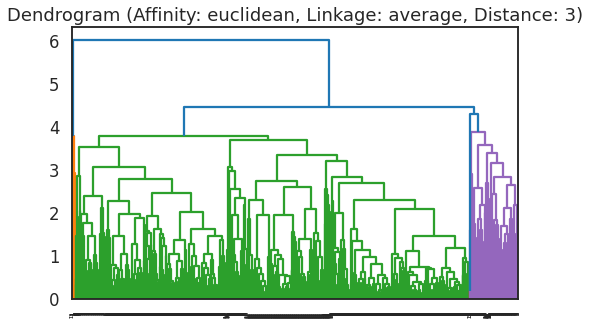

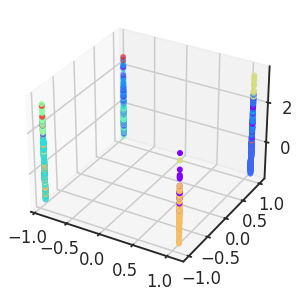

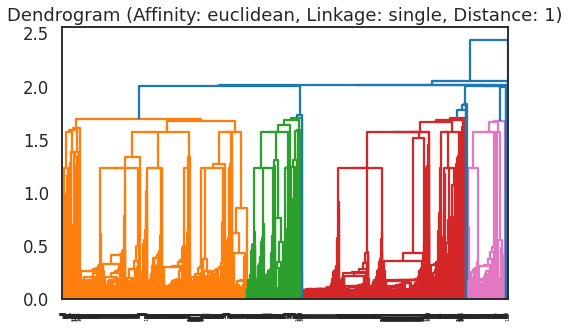

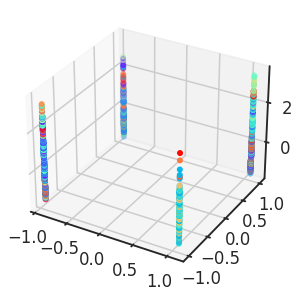

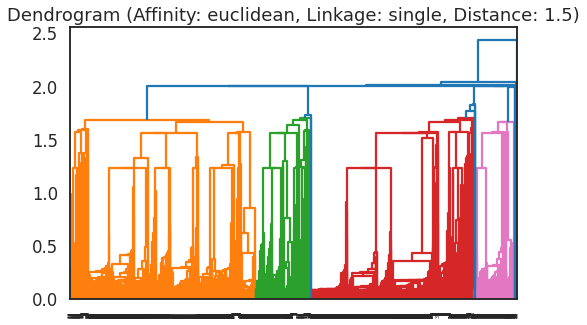

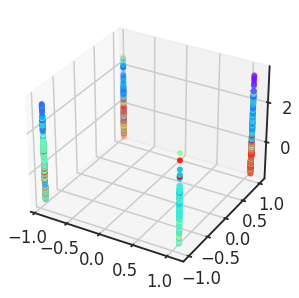

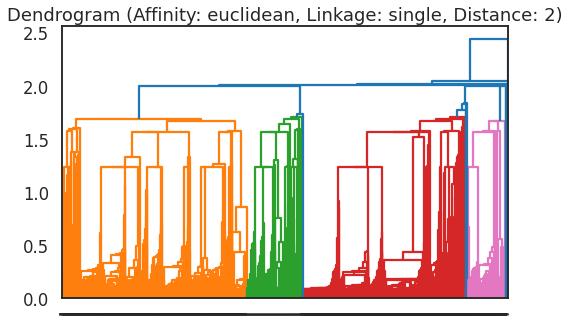

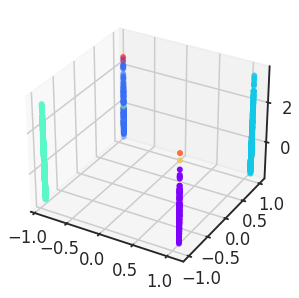

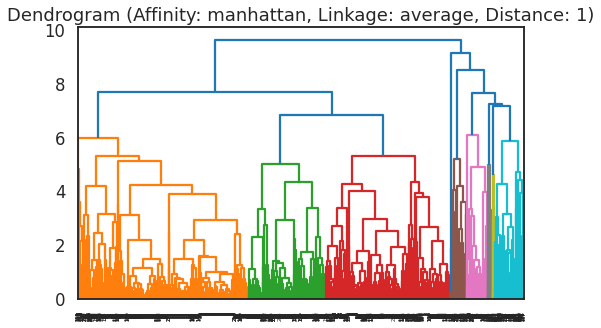

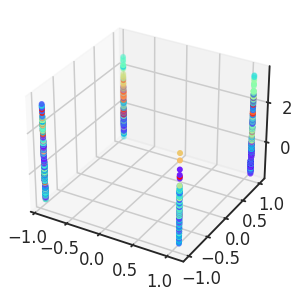

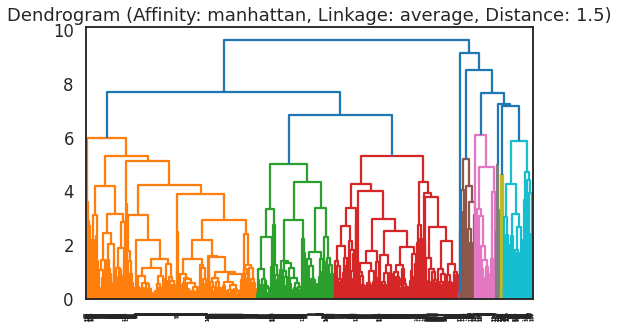

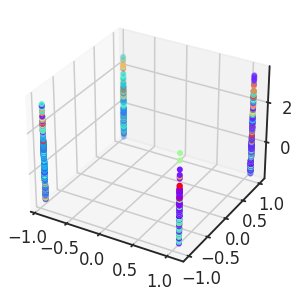

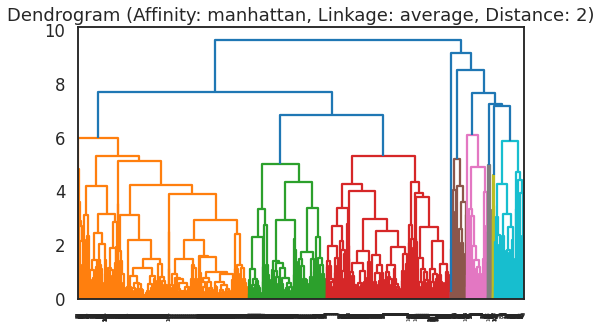

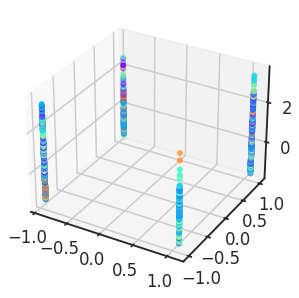

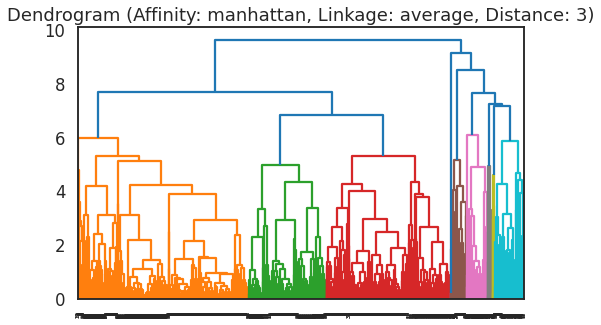

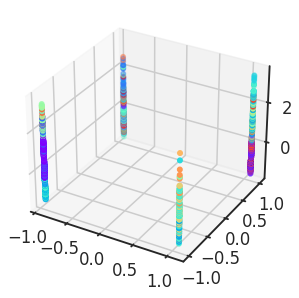

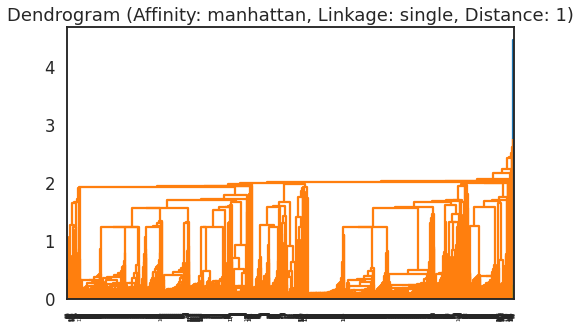

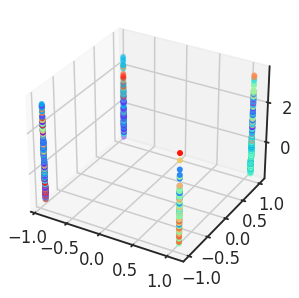

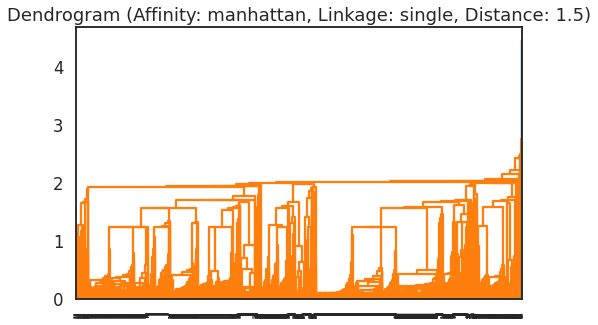

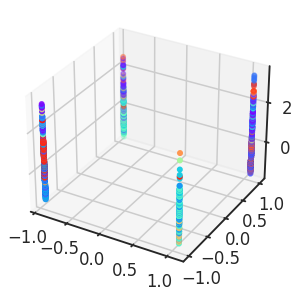

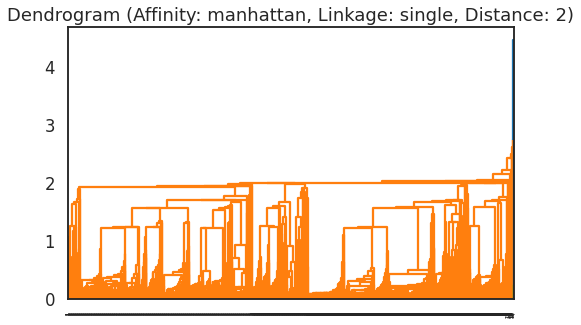

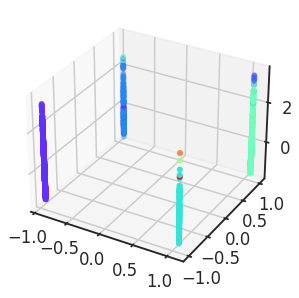

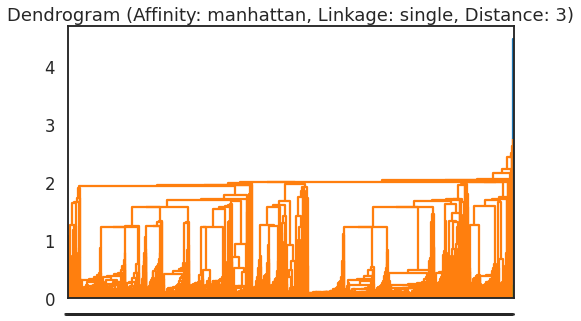

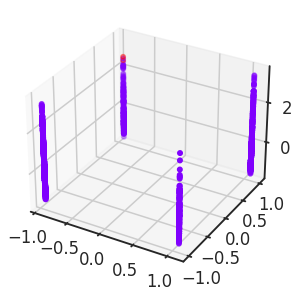

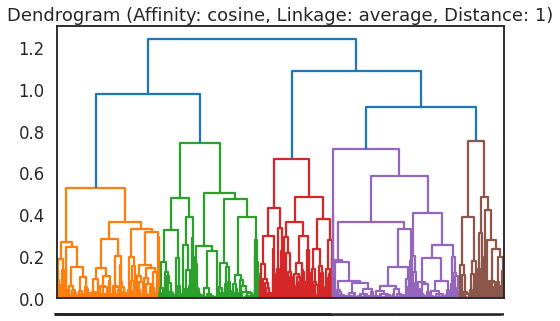

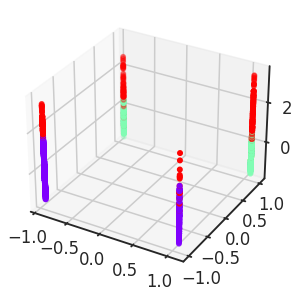

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram


df_norm 

def display_cluster(X, y=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

# Initialize the AgglomerativeClustering object
agg = AgglomerativeClustering(n_clusters=6)

# Fit the data to the model and predict the cluster labels
labels = agg.fit_predict(df_norm)

# Plot the clusters
display_cluster(df_norm[:, :3], labels)

#In the AgglomerativeClustering change the following parameters
##Linkage( use average and single )
#Distance_threshold (try different)
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

# Define parameters
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']
distances = [1, 1.5, 2, 3]

# Loop over different parameter combinations
best_score = -1
best_params = {}
for affinity in affinities:
    for linkage in linkages:
        for distance in distances:
            # Create clustering model
            if distance is None:
                model = AgglomerativeClustering(n_clusters=6, affinity=affinity, linkage=linkage)
            else:
                model = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage, distance_threshold=distance)

            # Fit model and get labels
            labels = model.fit_predict(df_norm)

            # Check number of unique labels
            if len(np.unique(labels)) < 2:
                continue

            # Plot dendrogram
            fig = plt.figure(figsize=(8, 5))
            plt.title(f"Dendrogram (Affinity: {affinity}, Linkage: {linkage}, Distance: {distance})")
            plot_dendrogram(model, labels=labels)

            # Plot clusters
            fig = plt.figure(figsize=(8, 5))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(df_norm[:, 0], df_norm[:, 1], df_norm[:, 2], c=labels, cmap='rainbow')
            ax.set_xlabel


The best parameter combination is eps=1.7 and min_samples=16, with a silhouette score of 0.39207862682559064
Number of clusters: 2


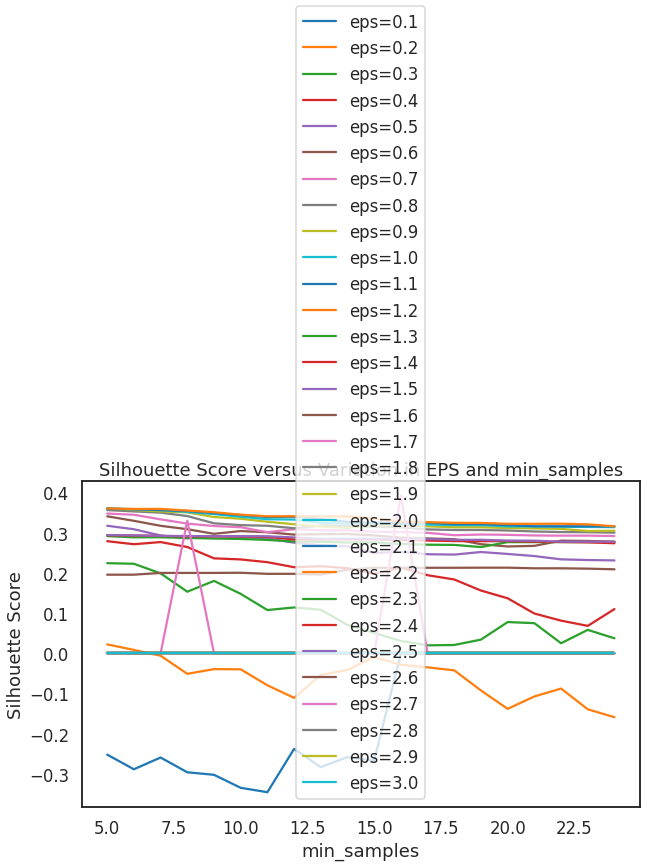

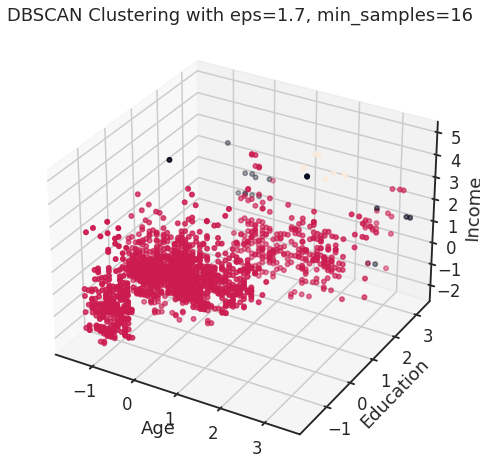

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset into a pandas DataFrame
df = pd.read_csv('Customer data (1).csv')

# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Normalize the data using StandardScaler
scaler = StandardScaler()
df_norm = scaler.fit_transform(df.iloc[:, 3:])

# Perform DBSCAN clustering and find the best parameter combination
eps_range = np.arange(0.1, 3.1, 0.1)
min_samples_range = range(5, 25)
silhouette_scores = np.zeros((len(eps_range), len(min_samples_range)))

for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_samples_range):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df_norm)
        labels = dbscan.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(df_norm, labels)
            silhouette_scores[i, j] = score

# Plot the silhouette scores versus the variation in eps and min_samples
fig, ax = plt.subplots(figsize=(10, 6))
for i, eps in enumerate(eps_range):
    ax.plot(min_samples_range, silhouette_scores[i], label=f"eps={eps:.1f}")
ax.legend()
ax.set_xlabel("min_samples")
ax.set_ylabel("Silhouette Score")
ax.set_title("Silhouette Score versus Variation in EPS and min_samples")

# Find the indices of the maximum silhouette score
idx = np.unravel_index(np.argmax(silhouette_scores, axis=None), silhouette_scores.shape)
best_eps, best_min_samples = eps_range[idx[0]], min_samples_range[idx[1]]
best_silhouette_score = silhouette_scores[idx]
print(f"The best parameter combination is eps={best_eps:.1f} and min_samples={best_min_samples}, with a silhouette score of {best_silhouette_score}")

# Fit DBSCAN with the best parameter combination
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(df_norm)
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")

# Plot the resulting clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_norm[:, 0], df_norm[:, 1], df_norm[:, 2], c=labels)
ax.set_title(f"DBSCAN Clustering with eps={best_eps:.1f}, min_samples={best_min_samples}")
ax.set_xlabel("Age")
ax.set_ylabel("Education")
ax.set_zlabel("Income")
plt.show()


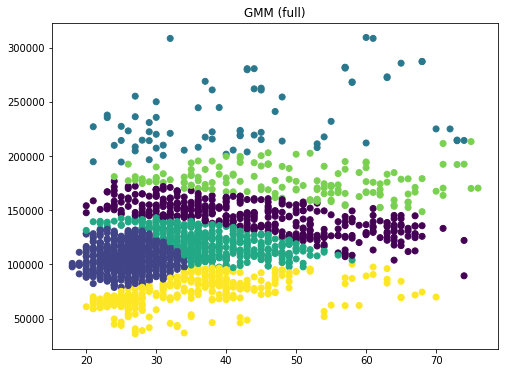

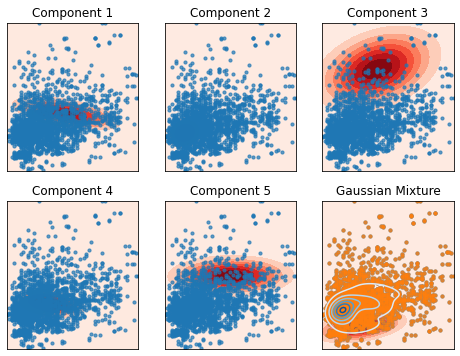

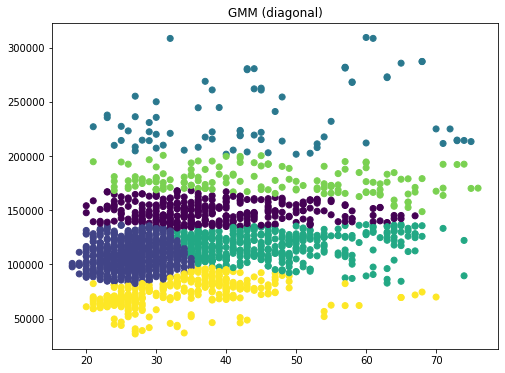

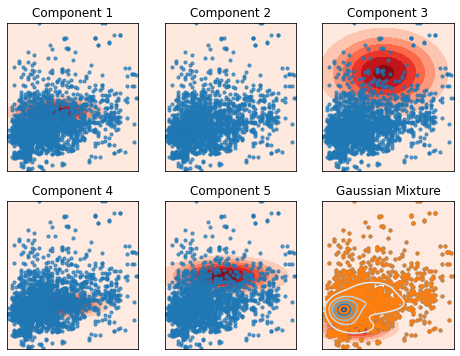

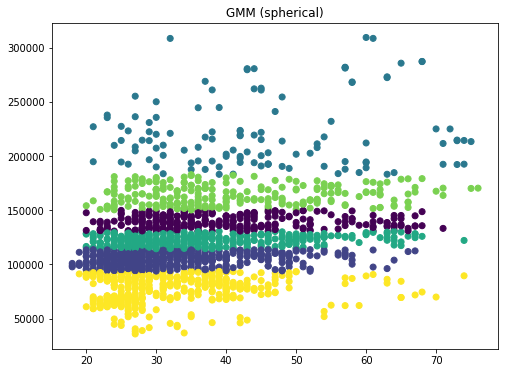

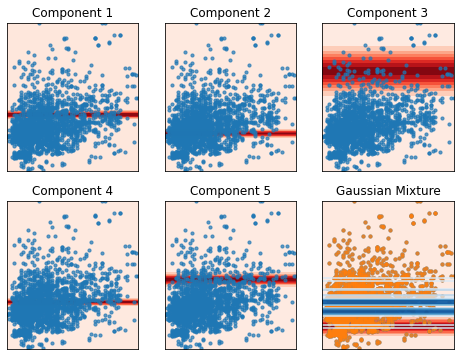

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

# Load the dataset into a pandas DataFrame
df = pd.read_csv('Customer data (1).csv')

# Extract relevant columns from the DataFrame
X = df[['Age', 'Income']]

# Fit GMM models
models = {
    'GMM (full)': GaussianMixture(n_components=6, covariance_type='full', random_state=42),
    'GMM (diagonal)': GaussianMixture(n_components=6, covariance_type='diag', random_state=42),
    'GMM (spherical)': GaussianMixture(n_components=6, covariance_type='spherical', random_state=42),
}

for name, model in models.items():
    model.fit(X)
    labels = model.predict(X)

    # Plot clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
    plt.title(name)
    plt.show()

    # Plot GMM distributions
    plt.figure(figsize=(8, 6))
    x = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100)
    y = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 100)
    XX, YY = np.meshgrid(x, y)
    pos = np.empty(XX.shape + (2,))
    pos[:, :, 0] = XX
    pos[:, :, 1] = YY

    for i, (mean, cov, weight) in enumerate(zip(model.means_, model.covariances_, model.weights_)):
        rv = multivariate_normal(mean, cov)
        plt.subplot(2, 3, i + 1)
        plt.contourf(XX, YY, rv.pdf(pos), cmap='Reds')
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=10, alpha=0.7)
        plt.title(f'Component {i+1}')
        plt.xticks([])
        plt.yticks([])

    plt.subplot(2, 3, 6)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=10, alpha=0.7)

    density = np.zeros_like(XX)
    for i, (mean, cov, weight) in enumerate(zip(model.means_, model.covariances_, model.weights_)):
        rv = multivariate_normal(mean, cov)
        density += rv.pdf(pos) * weight
    plt.contour(XX, YY, density, cmap='Blues')
    plt.title('Gaussian Mixture')
    plt.xticks([])
    plt.yticks([])

    plt.show()
